# DATA 35050.001 Fall 2021  Final Project ( Due:  5 PM, Friday December 03, 2021)

# Final Project Submission Guidelines

## Formatting Guidelines

It is very important that your Jupyter Notebook is formatted correctly with markdown, comments, and code that works.
Please do the following for each section

* Include a title as a Heading 2
* Include a brief summary of the section
* Include your code and make sure it is executable and correct, include comments with the code.
* Explain what you are going to do with the code chunk before the each cell of your jupyter notebook 
* At the end of the section, include a brief summary of the results.

## How to turn it in:

*  Your Jupyter notebook file must be named Pr0Fin_LastnameFirstInitial.ipynb. For example: the file name will be Pr0Fin_RimalR.ipynb if I submit the Final Project.
* You are to turn in your Jupyter notebook file only. No data files and no folders.
* It is assumed that you created your Jupyter notebook in a folder named Pr0Fin_student and in that folder is a Dataset folder. It is expected the path for importing a file is looking for a data folder, for example ‘Dataset/TheGeneral.csv’.

# What datasets to use?

You will be using the following datasets:

1) TheGeneral

2) MasterQuote

3) Abilitech dataset



# What you will be doing in this project?

* Suppose you are an employee of the insurance company. Your goal is to analyze and learn from the data and inform the management about the following:

1) The better way to predict the amount of a  quote for insurance and the most important features that helps to determine the quote

2) The better way to assess risk (because the goal of a company is to make profit)

## Exploratory Analysis

* You are expected to conduct some initial exploratory analysis and some visualizations. Make sure to explain the insight you got from that analysis

* Once you completed the modeling and obtain the result, You are expected to conduct exploratory analysis and some visualizations that can give some insight of your model and the results

# Modeling for predicting the MQuotedTotalPayment

* MQuotedTotalPayment is in df_MasterQuote which refers to the total quote amount the insurance company offered to the customers
* You will be using the features(predictors) from the dataset df_MasterQuote (and Bonus: Abilitech data)
* You may need to clean the data, impute data, merge data, drop columns, create dummy variables and use label encoder during the data preprocessing step
* Please make sure that all the predictors should make sense to you before using it for the modeling purpose
* This is a regression problem, so you implement various regression techniques you learned during this course. I would like you to report the RMSE, MAE, MAPE, and R_Squared corresponding to the test data set
* Finally compare your results from the models you implemented and explain the results from your best model
* Report the most important variables 


 # Modeling for Policy Risk
 
* For this problem, you are expected to create a target variable that you think will help to predict a risk for the company using df_TheGeneral (and Bonus: Abilitech data). Then you model the risk
(For example: If a customer have made many claims, or claims results to higher loss, or made claim as soon as the policy is active etc. then you may classify the customer for High Risk)
* You will be using the features(predictors) from the dataset df_TheGeneral (and Bonus: Abilitech data)
* You may need to clean the data, impute data, merge data, drop columns, create dummy variables and use label encoder during the data preprocessing step
* Please make sure that all the predictors should make sense to you before using it for the modeling purpose
* This is a classification problem, so you implement various classification techniques you learned during this course.  I would like you to report the confusion matrix, Accuracy, Sensitivity, Specificity and ROC curve corresponding to the test data set
* Finally compare your results from the models you implemented and explain the result from your best model
* Report the most important variables 

## Grading Scheme

|Tasks|	Possible Points|	
| --- | --- | 
|Data Exploration | 	10 Points|	
|Data Preprocessing and Feature Engineering|           	20 Points|
|Regression Modeling|      	20 Points|
|Model Comparison and Explanation of Best Regression Model| 	10 Points|
|Classification Modeling| 	20 Points|	
|Model Comparison and Explanation of Best Classification Model| 	10 Points|	
Graphical Representation and Analysis of Results|  	10 Points|	
|Bonus(using Abilitech dataset for Modeling)|20 Points|	
* You will lose points if you fail to provide the short explanation for each code chunk or if the code did not run

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

In [2]:
# import geoplotlib
# import plotly
# import dash

#import dash_core_components as dcc
#import dash_html_components as html
#from dash.dependencies import Input, Output
#import plotly.graph_objects as go




## Loading the datasets

### Loading the TheGeneral dataset

In [3]:
df_TheGeneral = pd.read_csv(r'C:\Users\willi\OneDrive\Desktop\Dataset\TheGeneral.csv', header = 0)

In [4]:
df_TheGeneral.sample(20)

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
9833,04ZJUS02M20SG131,VE4yMzQ5NTAy,1,04ZJUS0371F5Z2PS,4,1,0.00,PA0002424574,Other party at fault,C,PG_COLLISIONMERGE,2019-01-18 00:00:00,1,TN,TN,YES,2018-10-10 00:00:00,3,8.0,0.00,0.000000,0.0
3338,04ZJUS02H39BRSGN,Rkw0MTg3NTg4,1,04ZJUS133H235SGL,1,2,1614.42,PA0002447881,No fault,C,FIXEDOBJCOLL,2019-02-13 00:00:00,1,FL,FL,NO,2018-09-27 00:00:00,1,4.0,0.00,0.000000,0.0
8284,04ZJUS02CMTY0Y8D,UE4yODY5NzQ0,1,04ZJUS136NFP99EF,1,1,1186.24,PA0002274768,Insured at fault,C,PG_IVREARENDCV,2017-11-07 00:00:00,1,PA,PA,NO,2017-03-29 00:00:00,1,6.0,1186.24,0.000000,0.0
7907,04ZJUS01J6VDHQD0,UE40MDY5MjI0,1,04ZJUS03Q1S53SYK,2,1,1385.23,PA0002374297,Insured at fault,C,PG_IVREARENDCV,2018-09-09 00:00:00,1,PA,PA,NO,2018-07-10 00:00:00,2,11.0,1385.23,0.000000,0.0
4821,04ZJUS01ZFWMDNT1,T0Q4MTk4ODk1,1,04ZJUS03D3XNYQJ6,1,4,4411.01,PA0000138364,Other party at fault,C,MULTI CAR COLL W/INJ MIN,2002-09-07 16:00:00,4,OH,OH,NO,2078-12-31 00:00:00,7,5.0,3040.85,0.666667,16.0
10585,04ZJUS01SY9TDC3P,VVQzNzA5Njc2,1,04ZJUS033ZXNZ9WH,2,1,0.00,PA0002279427,Insured at fault,C,PG_COLLISIONBACKING,2017-12-09 00:00:00,1,UT,UT,NO,2017-11-09 00:00:00,1,1.0,0.00,7.000000,168.0
11034,04ZJUS024RVRYMMX,VlQzMzIzMzA0,1,04ZJUS030TT80YKX,2,1,1589.75,PA0002321286,No fault,C,ANIMAL,2018-04-14 00:00:00,2,VT,VT,NO,2018-03-06 00:00:00,1,9.0,1589.75,0.000000,0.0
7936,04ZJUS01LSY6V82T,UE40MTUyNTEx,1,04ZJUS03416MKD8L,2,1,0.00,PA0002398807,No fault,C,PG_COLLISIONMERGE,2018-11-15 00:00:00,0,PA,PA,NO,2018-09-03 00:00:00,1,NaN,NaN,NaN,NaN
4982,04ZJUS021XBFEDDT,T0g2ODI0NzU3,1,04ZJUS038206Y70F,1,2,2639.21,PA0000721946,Other party at fault,C,PD ONLY (2 CARS),2013-07-15 12:30:00,2,OH,OH,NO,2012-11-03 00:00:00,2,3.0,0.00,0.520833,12.5
3273,04ZJUS010SFJZ8PT,Rkw0MDcyNzQw,1,04ZJUS03CFX4GY5L,2,1,2312.69,PA0002368308,Insured at fault,C,PG_COLLISIONMERGE,2018-08-24 00:00:00,99,FL,FL,NO,2018-07-12 00:00:00,1,7.0,2312.69,0.000000,0.0


In [5]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

### Loading the MasterQuote dataset

In [6]:
df_MasterQuote = pd.read_csv(r'C:\Users\willi\OneDrive\Desktop\Dataset\MasterQuote.csv', header = 0)

In [7]:
df_MasterQuote.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,2016-01-02 22:25:47,2016-01-02 00:00:00,2017-01-02 00:00:00,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,2016-01-03 12:15:55,2016-01-03 00:00:00,2017-01-03 00:00:00,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,2
3,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,UkkyNzQ3ODg1,RI,12,2016-01-04 12:09:06,2016-01-26 00:00:00,2017-01-26 00:00:00,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1
4,MzM0MjAxMjU=,0.0,NOBI NOFC,Liability Only,1,OH,Single,NaN,OH,12,2016-01-04 12:20:07,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS023RYMYKKP,1,04ZJUS036201CX3G,1


In [8]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                34975 non-null  object 
 1   MQuotedTotalPayment        34975 non-null  float64
 2   BiFcCoverageInd            34975 non-null  object 
 3   CoverageTypeDescription    34975 non-null  object 
 4   DriversActive              34975 non-null  int64  
 5   GaragingState              34975 non-null  object 
 6   NamedInsuredMaritalStatus  34975 non-null  object 
 7   PolicyNumber               21113 non-null  object 
 8   PolicyStateCode            34975 non-null  object 
 9   PolicyTerm                 34975 non-null  int64  
 10  QuoteInitiatedTime         34975 non-null  object 
 11  TermEffectiveDate          34975 non-null  object 
 12  TermExpirationDate         34975 non-null  object 
 13  AbilitecContactID          34975 non-null  obj

## loading the Abilitech dataset 
* You can choose the most useful predictors from the Abilitech dataset to your model

In [9]:
df_Abilitech = pd.read_csv(r'C:\Users\willi\OneDrive\Desktop\Dataset\df_AP02.csv', header = 0)
df_Abilitech.head()


,AbilitecContactID,ACX_ZIPCODE,ACX_ZIP4,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004962,AP004963_Personal_Or_Joint_Non_Interest_Checking_Account_Fin_rank_base_20_AP004963,AP004964_Acquired_A_Non_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004964,AP004965_Personal_Or_Joint_Moneymarket_Account_Fin_r

In [10]:
df_Abilitech.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96501 entries, 0 to 96500
Data columns (total 300 columns):
 #    Column                                                                                                                      Dtype  
---   ------                                                                                                                      -----  
 0    AbilitecContactID                                                                                                           object 
 1    ACX_ZIPCODE                                                                                                                 int64  
 2    ACX_ZIP4                                                                                                                    float64
 3    AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913                       float64
 4    AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_

In [11]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

In [12]:
df_tg = df_TheGeneral

<AxesSubplot:>

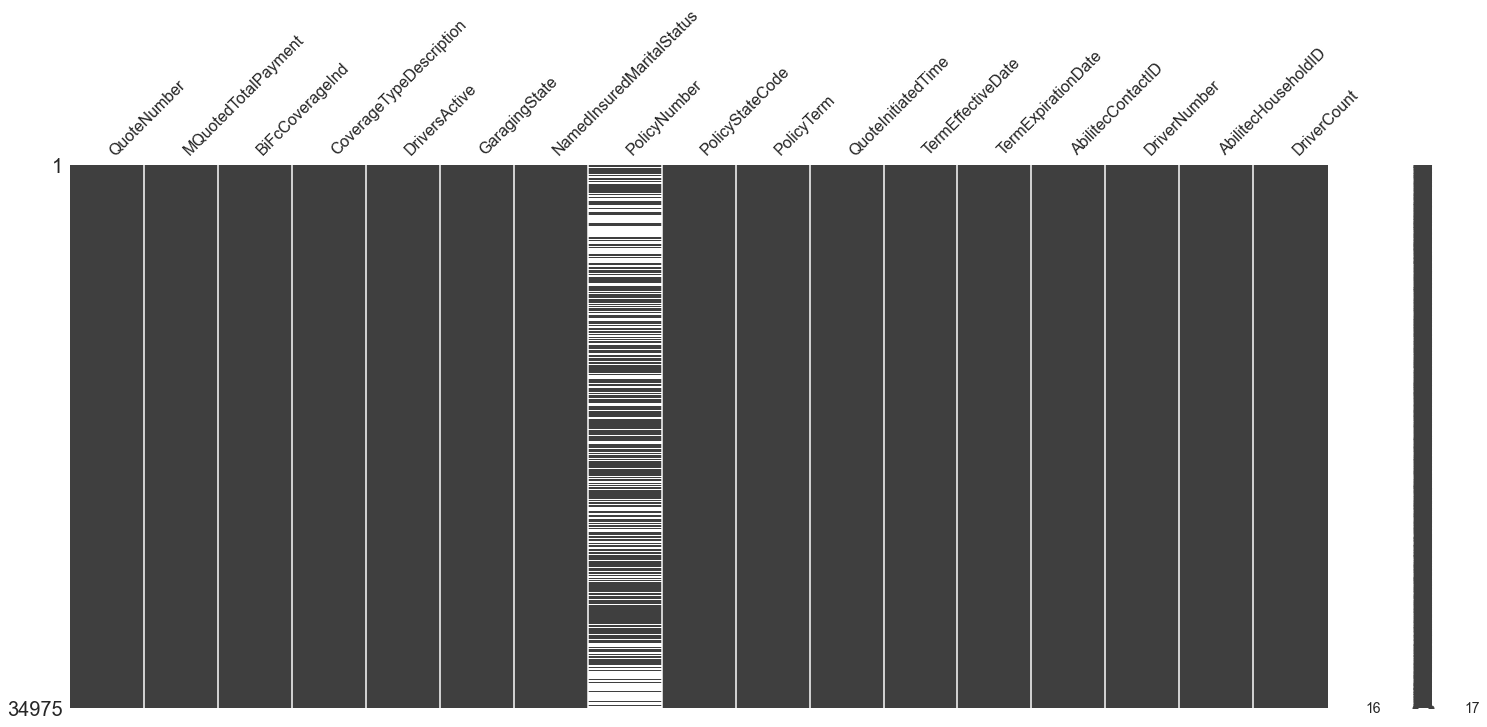

In [13]:
# We are missing way too many policy numbers to impute them as this would greatly increase the bias of out model. 
msno.matrix(df_MasterQuote)

In [14]:
df_mq = df_MasterQuote.drop('PolicyNumber', axis = 1)

In [15]:
df_mq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                34975 non-null  object 
 1   MQuotedTotalPayment        34975 non-null  float64
 2   BiFcCoverageInd            34975 non-null  object 
 3   CoverageTypeDescription    34975 non-null  object 
 4   DriversActive              34975 non-null  int64  
 5   GaragingState              34975 non-null  object 
 6   NamedInsuredMaritalStatus  34975 non-null  object 
 7   PolicyStateCode            34975 non-null  object 
 8   PolicyTerm                 34975 non-null  int64  
 9   QuoteInitiatedTime         34975 non-null  object 
 10  TermEffectiveDate          34975 non-null  object 
 11  TermExpirationDate         34975 non-null  object 
 12  AbilitecContactID          34975 non-null  object 
 13  DriverNumber               34975 non-null  int

In [16]:
df_mq.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,OR,12,2016-01-02 22:25:47,2016-01-02 00:00:00,2017-01-02 00:00:00,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,IL,12,2016-01-03 12:15:55,2016-01-03 00:00:00,2017-01-03 00:00:00,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,NV,12,2016-01-04 11:10:58,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,2
3,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,RI,12,2016-01-04 12:09:06,2016-01-26 00:00:00,2017-01-26 00:00:00,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1
4,MzM0MjAxMjU=,0.0,NOBI NOFC,Liability Only,1,OH,Single,OH,12,2016-01-04 12:20:07,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS023RYMYKKP,1,04ZJUS036201CX3G,1


In [17]:
# Here we get a general idea of our target variable
df_mq['MQuotedTotalPayment'].value_counts()

0.00       2266
855.00       31
944.00       30
518.00       30
780.00       28
           ... 
6114.00       1
838.92        1
2203.50       1
3296.00       1
4606.75       1
Name: MQuotedTotalPayment, Length: 9897, dtype: int64

In [18]:
# Removing all observations with 0 as teh quote amount as this means no quote was given and our regression will not like dividing by 0 in the future
df_mq = df_mq[df_mq.MQuotedTotalPayment != 0.0]

In [19]:
# Verifying that 0 has been removed
df_mq['MQuotedTotalPayment'].value_counts()

855.00      31
518.00      30
944.00      30
780.00      28
808.00      28
            ..
10715.00     1
4284.75      1
882.75       1
1991.53      1
3007.00      1
Name: MQuotedTotalPayment, Length: 9896, dtype: int64

In [20]:
# Counting the unique values
df_mq['BiFcCoverageInd'].unique()

array(['BI NOFC', 'BI FC', 'NOBI FC', 'NOBI NOFC'], dtype=object)

In [21]:
# Counting the unique values
df_mq['BiFcCoverageInd'].value_counts()

BI NOFC      18579
BI FC        13417
NOBI NOFC      417
NOBI FC        296
Name: BiFcCoverageInd, dtype: int64

In [22]:
# Dropping columns we do not plan to use
df_mq = df_mq.drop(columns = ['QuoteInitiatedTime','TermEffectiveDate','TermExpirationDate','AbilitecContactID','AbilitecHouseholdID'], axis = 1)

In [23]:
df_mq.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyStateCode,PolicyTerm,DriverNumber,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,OR,12,1,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,NV,12,1,2
3,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,RI,12,2,1
5,MzM0MjAzNzM=,778.0,BI FC,Full Coverage,1,OH,Single,OH,6,1,1
6,MzM0MjE5ODM=,2592.0,BI FC,Full Coverage,2,OK,Married,OK,12,1,2


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Widowed'),
  Text(5, 0, 'Domestic Partner'),
  Text(6, 0, 'Civil Union')])

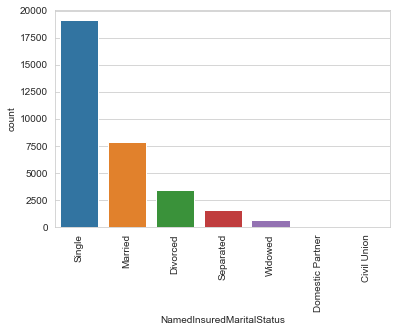

In [24]:
# Visualization to view the distribution of martial status
sns.countplot(x='NamedInsuredMaritalStatus', data=df_mq)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Liability Only'),
  Text(1, 0, 'Full Coverage'),
  Text(2, 0, 'Bond')])

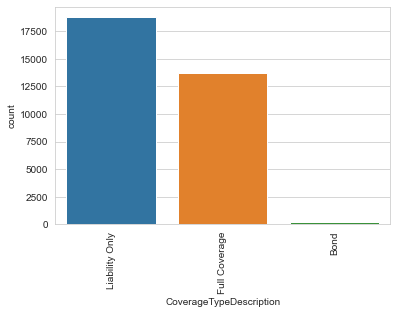

In [25]:
# Same plot for coverage type
sns.countplot(x='CoverageTypeDescription', data=df_mq)
plt.xticks(rotation=90)

In [26]:
df_mq['MQuotedTotalPayment'].value_counts()

855.00      31
518.00      30
944.00      30
780.00      28
808.00      28
            ..
10715.00     1
4284.75      1
882.75       1
1991.53      1
3007.00      1
Name: MQuotedTotalPayment, Length: 9896, dtype: int64

In [27]:
df_mq

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyStateCode,PolicyTerm,DriverNumber,DriverCount
0,MzM0MDA0OTE=,1136.00,BI NOFC,Liability Only,1,OR,Single,OR,12,1,1
2,MzM0MTc2MTk=,1160.00,BI NOFC,Liability Only,2,NV,Married,NV,12,1,2
3,MzM0MTk3MjQ=,3054.00,BI FC,Full Coverage,2,RI,Married,RI,12,2,1
5,MzM0MjAzNzM=,778.00,BI FC,Full Coverage,1,OH,Single,OH,6,1,1
6,MzM0MjE5ODM=,2592.00,BI FC,Full Coverage,2,OK,Married,OK,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...
34970,NjUzODg5NzY=,3452.50,BI FC,Full Coverage,2,MN,Single,MN,6,1,3
34971,NjUzOTE5Mjg=,1235.00,BI NOFC,Liability Only,1,GA,Single,GA,6,1,1
34972,NjUzOTI4ODg=,2297.00,BI FC,Full Coverage,1,OK,Single,OK,12,1,1
34973,NjUzOTM3MzQ=,1207.00,BI NOFC,Liability Only,2,KS,Married,KS,12,1,4


In [28]:
# One hot encoding for the martial status variable
onehot_marriage = pd.get_dummies(df_mq['NamedInsuredMaritalStatus'], prefix='', 
                                 drop_first=False, dtype='int')

In [29]:
# One hot encoding for the Coverage Indicator variable
onehot_cov = pd.get_dummies(df_mq['BiFcCoverageInd'], prefix='', 
                                 drop_first=False, dtype='int')

In [30]:
# One hot encoding for the Coverage Type
onehot_covdes = pd.get_dummies(df_mq['CoverageTypeDescription'], prefix='', 
                                 drop_first=False, dtype='int')

In [31]:
# Joining those new encodings together
df_mq = pd.concat([df_mq, onehot_marriage, onehot_cov, onehot_covdes], axis=1)

In [32]:
df_mq

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyStateCode,PolicyTerm,DriverNumber,DriverCount,_Civil Union,_Divorced,_Domestic Partner,_Married,_Separated,_Single,_Widowed,_BI FC,_BI NOFC,_NOBI FC,_NOBI NOFC,_Bond,_Full Coverage,_Liability Only
0,MzM0MDA0OTE=,1136.00,BI NOFC,Liability Only,1,OR,Single,OR,12,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,MzM0MTc2MTk=,1160.00,BI NOFC,Liability Only,2,NV,Married,NV,12,1,2,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,MzM0MTk3MjQ=,3054.00,BI FC,Full Coverage,2,RI,Married,RI,12,2,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,MzM0MjAzNzM=,778.00,BI FC,Full Coverage,1,OH,Single,OH,6,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
6,MzM0MjE5ODM=,2592.00,BI FC,Full Coverage,2,OK,Married,OK,12,1,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34970,NjUzODg5NzY=,3452.50,BI FC,Full Coverage,2,MN,Single,MN,6,1,3,0,0,0,0,0,1,0,1,0,0,0,0,1,0
34971,NjUzOTE5Mjg=,1235.00,BI NOFC,Liability Only,1,GA,Single,GA,6,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
34972,NjUzOTI4ODg=,2297.00,BI FC,Full Coverage,1,OK,Single,OK,12,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
34973,NjUzOTM3MzQ=,1207.00,BI NOFC,Liability Only,2,KS,Married,KS,12,1,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [33]:
# Dropping old variables and any remaining that we do not plan to use
df_mq = df_mq.drop(columns = ['QuoteNumber','BiFcCoverageInd','CoverageTypeDescription','GaragingState','NamedInsuredMaritalStatus','PolicyStateCode'],axis=1)

In [34]:
df_mq

,MQuotedTotalPayment,DriversActive,PolicyTerm,DriverNumber,DriverCount,_Civil Union,_Divorced,_Domestic Partner,_Married,_Separated,_Single,_Widowed,_BI FC,_BI NOFC,_NOBI FC,_NOBI NOFC,_Bond,_Full Coverage,_Liability Only
0,1136.00,1,12,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,1160.00,2,12,1,2,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,3054.00,2,12,2,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,778.00,1,6,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
6,2592.00,2,12,1,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34970,3452.50,2,6,1,3,0,0,0,0,0,1,0,1,0,0,0,0,1,0
34971,1235.00,1,6,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
34972,2297.00,1,12,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
34973,1207.00,2,12,1,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [35]:
#Create the train test split you can set the parameters to you liking
X = df_mq.drop('MQuotedTotalPayment', axis = 1) #keep features only for X
y = df_mq['MQuotedTotalPayment'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32709 entries, 0 to 34974
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   DriversActive      32709 non-null  int64
 1   PolicyTerm         32709 non-null  int64
 2   DriverNumber       32709 non-null  int64
 3   DriverCount        32709 non-null  int64
 4   _Civil Union       32709 non-null  int32
 5   _Divorced          32709 non-null  int32
 6   _Domestic Partner  32709 non-null  int32
 7   _Married           32709 non-null  int32
 8   _Separated         32709 non-null  int32
 9   _Single            32709 non-null  int32
 10  _Widowed           32709 non-null  int32
 11  _BI FC             32709 non-null  int32
 12  _BI NOFC           32709 non-null  int32
 13  _NOBI FC           32709 non-null  int32
 14  _NOBI NOFC         32709 non-null  int32
 15  _Bond              32709 non-null  int32
 16  _Full Coverage     32709 non-null  int32
 17  _Liability O

In [37]:
# Multiple linear regression built on the training data
X_trainlm = sm.add_constant(X_train).copy()

lr_1 = sm.OLS(y_train, X_trainlm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MQuotedTotalPayment   R-squared:                       0.385
Model:                             OLS   Adj. R-squared:                  0.385
Method:                  Least Squares   F-statistic:                     1172.
Date:                 Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                         23:49:37   Log-Likelihood:            -2.1628e+05
No. Observations:                26167   AIC:                         4.326e+05
Df Residuals:                    26152   BIC:                         4.327e+05
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -280.2328     64.587     -4.339      0.000    -406.827    -153.638
DriversActive       386.9542     13.770     28.101      0.000     359.964     413.944
PolicyTerm          138.1422      2.015     68.547      0.000     134.192     142.092
DriverNumber        200.5050     24.897      8.053      0.000     151.706     249.304
DriverCount          80.7282      5.579     14.470      0.000      69.793      91.663
_Civil Union       -128.3374    414.972     -0.309      0.757    -941.704     685.030
_Divorced           -55.0325     95.826     -0.574      0.566    -242.856     132.791
_Domestic Partner  -202.6674    476.060     -0.426      0.670   -1135.770     730.435
_Married           -224.8596     95.427     -2.356      0.018    -411.902     -37.817
_Separated           22.9481     97.253      0.236      0.813    -167.674     213.570
_Single             243.0519     94.795      2.564      0.010      57.249     428.855
_Widowed             64.6641    100.530      0.643      0.520    -132.380     261.709
_BI FC              -97.8852     27.824     -3.518      0.000    -152.421     -43.349
_BI NOFC           -617.3344     28.362    -21.766      0.000    -672.925    -561.744
_NOBI FC            503.7722     41.554     12.123      0.000     422.324     585.221
_NOBI NOFC          -68.7854     40.228     -1.710      0.087    -147.635      10.064
_Bond              -472.3322     49.139     -9.612      0.000    -568.647    -376.017
_Full Coverage      405.8871     31.582     12.852      0.000     343.984     467.790
_Liability Only    -213.7877     31.765     -6.730      0.000    -276.048    -151.527
==============================================================================
Omnibus:                    18591.667   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           636586.603
Skew:                           3.008   Prob(JB):                         0.00
Kurtosis:                      26.403   Cond. No.                     1.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.58e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
# Multiple Linear regression built on the test data and had variables removed using backwards elimination
X_test_lm = X_test.copy()
X_testlm = X_test.drop(['_Separated','_Domestic Partner','_Divorced','DriverNumber','_Widowed'], axis = 1)


lr_test = sm.OLS(y_test, X_testlm).fit()
pred = lr_test.predict(X_testlm) 

lr_test.summary2(float_format=".2f")

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:              OLS                 Adj. R-squared:     0.376      
Dependent Variable: MQuotedTotalPayment AIC:                108376.4878
Date:               2021-12-02 23:49    BIC:                108444.3477
No. Observations:   6542                Log-Likelihood:     -54178.    
Df Model:           9                   F-statistic:        438.9      
Df Residuals:       6532                Prob (F-statistic): 0.00       
R-squared:          0.377               Scale:              9.1516e+05 
-----------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
-----------------------------------------------------------------------
DriversActive     414.8875  27.2515  15.2244 0.0000  361.4657  468.3094
PolicyTerm        136.0722   4.0967  33.2155 0.0000  128.0414  144.1030
DriverCount        73.8447  11.1654   6.6137 0.0000   51.9569   95.7326
_Civil Union        0.0000   0.0000   1.1300 0.2585   -0.0000    0.0000
_Married         -234.4427  41.5350  -5.6445 0.0000 -315.8650 -153.0204
_Single           198.7411  32.3699   6.1397 0.0000  135.2855  262.1968
_BI FC           -106.4151  43.6796  -2.4363 0.0149 -192.0414  -20.7889
_BI NOFC         -612.8252  51.7161 -11.8498 0.0000 -714.2056 -511.4447
_NOBI FC          465.2915  79.6279   5.8433 0.0000  309.1947  621.3883
_NOBI NOFC       -203.0093  91.9184  -2.2086 0.0272 -383.1993  -22.8192
_Bond            -551.0428 109.6165  -5.0270 0.0000 -765.9270 -336.1586
_Full Coverage    358.8764  55.0896   6.5144 0.0000  250.8828  466.8700
_Liability Only  -264.7917  51.9924  -5.0929 0.0000 -366.7139 -162.8695
-----------------------------------------------------------------------
Omnibus:           5047.516    Durbin-Watson:       2.016              
Prob(Omnibus):     0.000       Jarque-Bera (JB):    191546.820         
Skew:              3.351       Prob(JB):            0.000              
Kurtosis:          28.647      Condition No.:       2678105530771272192
=======================================================================
* The condition number is large (3e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

In [39]:
# MAPE of the Multiple Linear Regression Model. It is Not good at all but lets look at some other metrics
mean_absolute_percentage_error(y_test, pred)*100

43.281039699216464

In [40]:
# Below is the MSE, RMSE, MAE and RMSPE of our model and we have a massive Mean Squared Error so we should look to try a new model. 
test_mse = sm.tools.eval_measures.mse(y_test, pred, axis=0)
test_rmse= sm.tools.eval_measures.rmse(y_test, pred, axis=0)
test_mae= sm.tools.eval_measures.meanabs(y_test, pred, axis=0)
test_rmspe= sm.tools.eval_measures.rmspe(y_test, pred, axis=0)

print(f' the train MSE is:{test_mse}')
print(f' the train RMSE is:{test_rmse}')
print(f' the train MAE is:{test_mae}')
print(f' the train RMSPE is:{test_rmspe}')

 the train MSE is:913764.385788517
 the train RMSE is:955.910239399347
 the train MAE is:615.95485455828
 the train RMSPE is:5.895945567373433


In [41]:
# LASSO Model built quickly to get a baseline
lasso_model = Lasso(alpha=.5)
lasso=lasso_model.fit(X_train , y_train)
lasso_predict = lasso.predict(X_test)
lasso_MAPE = mean_absolute_percentage_error(y_test,lasso_predict)
print("Lasso MAPE value: ",lasso_MAPE)
Accuracy = 100 - lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))

Lasso MAPE value:  0.43486031725880187
Accuracy of Lasso Regression: 99.57%.


In [42]:
# R2 of the Lasso
rsl = lasso.score(X_test, y_test)
rsl

0.3757521193619977

In [43]:
test_mse = sm.tools.eval_measures.mse(y_test, lasso_predict, axis=0)
test_rmse= sm.tools.eval_measures.rmse(y_test, lasso_predict, axis=0)
test_mae= sm.tools.eval_measures.meanabs(y_test, lasso_predict, axis=0)
test_rmspe= sm.tools.eval_measures.rmspe(y_test, lasso_predict, axis=0)
print(f' the train MSE is:{test_mse}')
print(f' the train RMSE is:{test_rmse}')
print(f' the train MAE is:{test_mae}')
print(f' the train RMSPE is:{test_rmspe}')

 the train MSE is:915323.8806481132
 the train RMSE is:956.7256036336192
 the train MAE is:617.6329077793973
 the train RMSPE is:5.926035956081991


iteration 0.001 done
iteration 0.01 done
iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done


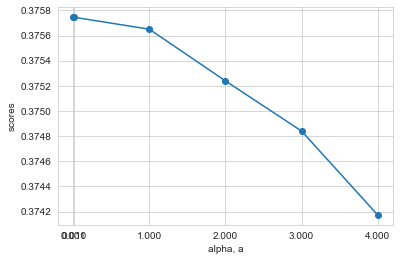

In [44]:
# Used to determine the best alpha value for our Refine LASSO
alphas = [.001, .01, 1, 2, 3, 4] # here alpha is the lambda in the lecture note, the coefficient of lasso penalty
scores = []

for a in alphas:
    lasso = Lasso(alpha = a, normalize = False) # I choose normalize = False here
    lasso.fit(X_train, y_train)
    #yhat_test=lasso.predict(X_test)
    #scores.append(mean_squared_error(y_test, yhat_test))
    scores.append(lasso.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [45]:
# Set lasso regression parameters
lasso_reg = Lasso(alpha=1, fit_intercept=False, normalize=True, max_iter=5000)

# Create line on regression data and show fit
lasso_reg.fit(sm.add_constant(X),y)

# Create predictions and store in a list
lasso_pred = lasso_reg.predict(sm.add_constant(X))



# Store regression coefficients for features for comparison
reg_coeff = pd.DataFrame()
reg_coeff["Feature"] = sm.add_constant(X).columns
reg_coeff["Lasso Coefficient"] = np.transpose(lasso_reg.coef_)
reg_coeff.round(4)

,Feature,Lasso Coefficient
0,const,-0.0000
1,DriversActive,383.1717
2,PolicyTerm,136.3919
3,DriverNumber,136.7023
4,DriverCount,78.3550
5,_Civil Union,-0.0000
6,_Divorced,-81.5107
7,_Domestic Partner,-0.0000
8,_Married,-252.5204
9,_Separated,-0.0000


In [46]:
# Dropping any insignifigant values
reg_coeff[reg_coeff['Lasso Coefficient']!=0].round(4)


,Feature,Lasso Coefficient
0,const,-0.0000
1,DriversActive,383.1717
2,PolicyTerm,136.3919
3,DriverNumber,136.7023
4,DriverCount,78.3550
6,_Divorced,-81.5107
8,_Married,-252.5204
10,_Single,190.6744
13,_BI NOFC,-975.1757
14,_NOBI FC,488.0231


iteration 1 done
iteration 5 done
iteration 10 done
iteration 15 done
iteration 20 done
iteration 25 done
iteration 30 done
iteration 35 done


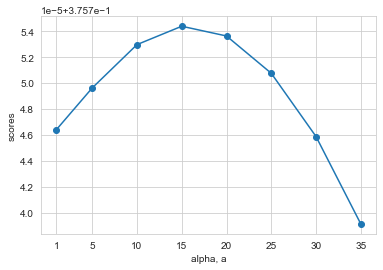

In [47]:

alphas = [1, 5, 10, 15, 20, 25, 30, 35] #alpha values do not stop at 1, they can go to +infinity, but normally are under 50
scores = []

for a in alphas:
    ridge = Ridge(alpha = a, normalize = False) # Normalization True or False  will give different value of alpha 
    ridge.fit(X_train, y_train)
    scores.append(ridge.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [48]:
# Set ridge regression parameters
ridge_reg = Ridge(alpha=15, fit_intercept=False, normalize=True)

# Create line on regression data and show fit
ridge_reg.fit(sm.add_constant(X), y)

# Create predictions and store in a list
ridge_pred = ridge_reg.predict(sm.add_constant(X))

# Save full-featured (ridge) set of regression coefficients
reg_coeff["Ridge Coefficient"] = np.transpose(ridge_reg.coef_)
reg_coeff.round(2)

,Feature,Lasso Coefficient,Ridge Coefficient
0,const,-0.00,-232.63
1,DriversActive,383.17,390.57
2,PolicyTerm,136.39,137.59
3,DriverNumber,136.70,167.55
4,DriverCount,78.35,79.14
5,_Civil Union,-0.00,-37.27
6,_Divorced,-81.51,-91.16
7,_Domestic Partner,-0.00,-55.15
8,_Married,-252.52,-264.86
9,_Separated,-0.00,-17.80


In [49]:
# Ridge model built Using the best Alpha value
ridge_model = Ridge(alpha=15)
ridge=ridge_model.fit(X_train , y_train)
ridge_predict = ridge.predict(X_test)
ridge_MAPE = mean_absolute_percentage_error(y_test,ridge_predict)
print("MAPE value: ",ridge_MAPE)
Accuracy = 100 - ridge_MAPE
print('Accuracy of Ridge Regression: {:0.2f}%.'.format(Accuracy))

MAPE value:  0.43496374451363956
Accuracy of Ridge Regression: 99.57%.


In [50]:
test_mse = sm.tools.eval_measures.mse(y_test, ridge_predict, axis=0)
test_rmse= sm.tools.eval_measures.rmse(y_test, ridge_predict, axis=0)
test_mae= sm.tools.eval_measures.meanabs(y_test, ridge_predict, axis=0)
test_rmspe= sm.tools.eval_measures.rmspe(y_test, ridge_predict, axis=0)
print(f' the train MSE is:{test_mse}')
print(f' the train RMSE is:{test_rmse}')
print(f' the train MAE is:{test_mae}')
print(f' the train RMSPE is:{test_rmspe}')

 the train MSE is:915320.5630431252
 the train RMSE is:956.7238697989745
 the train MAE is:617.724510004967
 the train RMSPE is:5.928737780211205


In [51]:
# Ridge r2 value
rsr = ridge.score(X_test, y_test)
rsr

0.3757543819577044

In [52]:
df_mq.describe()

,MQuotedTotalPayment,DriversActive,PolicyTerm,DriverNumber,DriverCount,_Civil Union,_Divorced,_Domestic Partner,_Married,_Separated,_Single,_Widowed,_BI FC,_BI NOFC,_NOBI FC,_NOBI NOFC,_Bond,_Full Coverage,_Liability Only
count,32709.00000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000,32709.000000
mean,1661.94261,1.300651,9.755297,1.040937,1.746094,0.000122,0.105323,0.000122,0.240148,0.048549,0.584793,0.020942,0.410193,0.568009,0.009049,0.012749,0.007368,0.419242,0.573390
std,1201.99291,0.553083,2.903409,0.238095,1.211219,0.011058,0.306973,0.011058,0.427180,0.214927,0.492765,0.143193,0.491876,0.495361,0.094699,0.112190,0.085522,0.493443,0.494592
min,189.00000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,876.00000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1337.92000,1.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2087.00000,2.000000,12.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,18803.00000,6.000000,12.000000,6.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df_mq

,MQuotedTotalPayment,DriversActive,PolicyTerm,DriverNumber,DriverCount,_Civil Union,_Divorced,_Domestic Partner,_Married,_Separated,_Single,_Widowed,_BI FC,_BI NOFC,_NOBI FC,_NOBI NOFC,_Bond,_Full Coverage,_Liability Only
0,1136.00,1,12,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,1160.00,2,12,1,2,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,3054.00,2,12,2,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,778.00,1,6,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
6,2592.00,2,12,1,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34970,3452.50,2,6,1,3,0,0,0,0,0,1,0,1,0,0,0,0,1,0
34971,1235.00,1,6,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
34972,2297.00,1,12,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
34973,1207.00,2,12,1,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [54]:
X1 = df_mq.drop(['MQuotedTotalPayment'], axis = 1) #keep features only for X
y1 = df_mq['MQuotedTotalPayment'] #keep target variable only for y

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [55]:
X1

,DriversActive,PolicyTerm,DriverNumber,DriverCount,_Civil Union,_Divorced,_Domestic Partner,_Married,_Separated,_Single,_Widowed,_BI FC,_BI NOFC,_NOBI FC,_NOBI NOFC,_Bond,_Full Coverage,_Liability Only
0,1,12,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,2,12,1,2,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,2,12,2,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,1,6,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
6,2,12,1,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34970,2,6,1,3,0,0,0,0,0,1,0,1,0,0,0,0,1,0
34971,1,6,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
34972,1,12,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
34973,2,12,1,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [56]:
y1

0        1136.00
2        1160.00
3        3054.00
5         778.00
6        2592.00
          ...   
34970    3452.50
34971    1235.00
34972    2297.00
34973    1207.00
34974    2396.82
Name: MQuotedTotalPayment, Length: 32709, dtype: float64

In [57]:
# Basic Decision Tree Regressor
reg_tree = DecisionTreeRegressor().fit(X_train1,y_train1)
DT_predict = reg_tree.predict(X_test1) #Predictions on Testing data

In [58]:
# Predictors for the Decision Tree
y_predictions = reg_tree.predict(X_test)

In [59]:
# R2 for the regressor
score_train = reg_tree.score(X_train, y_train)
print(score_train)
print("")


0.4560148849846257



In [60]:
# Test R2
score_test = reg_tree.score(X_test, y_test)
print(score_test)
print("")

0.3963250718595741



In [61]:
test_mse = sm.tools.eval_measures.mse(y_test, y_predictions, axis=0)
test_rmse= sm.tools.eval_measures.rmse(y_test, y_predictions, axis=0)
test_mae= sm.tools.eval_measures.meanabs(y_test, y_predictions, axis=0)
test_rmspe= sm.tools.eval_measures.rmspe(y_test, y_predictions, axis=0)
print(f' the train MSE is:{test_mse}')
print(f' the train RMSE is:{test_rmse}')
print(f' the train MAE is:{test_mae}')
print(f' the train RMSPE is:{test_rmspe}')

 the train MSE is:885158.1158925723
 the train RMSE is:940.8284200068429
 the train MAE is:596.3475523917411
 the train RMSPE is:5.724898356739167


In [62]:
# MAPE for the Decision Tree
mean_absolute_percentage_error(y_test, y_predictions)*100

41.51136993632467

In [63]:
# Random Forest Regression
clf_rf = RandomForestRegressor(random_state = 42, n_estimators=100, max_depth = 5) #max_depth = 5,specify max depth otherwise it may overfit
clf_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [64]:
# Predictions for the Random Forest
y_pred_rf = clf_rf.predict(X_test)

In [65]:
# Calculating Root Mean Squared Error
clf_rf_test_rmse= sm.tools.eval_measures.rmse(y_test, y_pred_rf, axis=0)

In [66]:
clf_rf_test_rmse

935.1077958645412

In [67]:
# MAPE for the Random Forest
mean_absolute_percentage_error(y_test, y_pred_rf)*100

41.72065888895792

In [68]:
feature_importances = np.mean([     tree.feature_importances_ for tree in clf_rf.estimators_ ], axis=0)

In [69]:
feature_importances = pd.DataFrame(feature_importances)

In [70]:
names = pd.DataFrame(list(X.columns))
df_feature_importances = pd.concat([feature_importances, names], axis = 1)
df_feature_importances.columns = ['Importance', 'Features']
df_feature_importances.sort_values('Importance', ascending = False)

,Importance,Features
12,0.467934,_BI NOFC
1,0.302157,PolicyTerm
0,0.094480,DriversActive
16,0.068735,_Full Coverage
3,0.027032,DriverCount
9,0.021995,_Single
2,0.011442,DriverNumber
7,0.003758,_Married
10,0.001062,_Widowed
14,0.000571,_NOBI NOFC


## The methods that I chose did not appear to be optimal as each models MSE was incredibly hight with accuracy scores in and around 50% for the best model. The best r2 value that we got was .376 which was consistant between the Multiple Linear regression and the LASSO regression. In this scenario the LASSO definately won because although it had a low R2 value we did have a good accuracy at 99%. 

## The absolute best model we had though was our Decision Tree Regression with an r2 value of .396, a MAPE 43.5% but the lowest MSE at 885158.1158925723. Which is still crazy high.

# Part 2 - The General Classification Models

In [71]:
df_TheGeneral

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,4,1,5086.61,PA0002364104,No fault,C,HAIL,2018-08-06 00:00:00,98,CO,CO,NO,2018-05-29 00:00:00,1,9.0,5086.61,0.0,0.0
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0
2,04ZJUS02K2KC7DMW,Q080MDExOTIz,1,04ZJUS035ZXBZEH1,2,1,21397.74,PA0002344011,Insured at fault,C,PG_COLLISIONINTERSECTION,2018-06-17 00:00:00,1,CO,CO,NO,2018-05-25 00:00:00,1,53.0,21397.74,0.0,0.0
3,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348918,No fault,C,HAIL,2018-06-19 00:00:00,98,CO,CO,YES,2018-06-01 00:00:00,2,14.0,0.00,0.0,0.0
4,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348997,No fault,C,GLASSBREAKAGE,2018-06-30 00:00:00,1,CO,CO,NO,2018-06-01 00:00:00,2,1.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11064,04ZJUS01E9Y3261W,VlQzOTQzOTAy,1,04ZJUS03ETSDL0BR,1,1,0.00,PA0002366306,No fault,C,VEHCOLLISION,2018-08-18 00:00:00,1,NH,VT,NO,2018-04-06 00:00:00,1,1.0,0.00,18.0,432.0
11065,04ZJUS020YQDGQSJ,VlQzOTc5NTgz,1,04ZJUS03S7B0E68L,1,1,0.00,PA0002350290,Insured at fault,C,FALLINGOBJECT,2018-07-03 00:00:00,0,NH,VT,NO,2018-05-01 00:00:00,2,NaN,NaN,NaN,NaN
11066,04ZJUS11XYCBBER5,VlQzOTcyODE2,1,04ZJUS03B7H1T2PQ,2,1,2876.38,PA0002325076,Insured at fault,C,FIXEDOBJCOLL,2018-04-21 00:00:00,99,VT,VT,NO,2018-04-21 00:00:00,1,9.0,2876.38,0.0,0.0
11067,04ZJUS022QSF2Q0W,VlQzOTg0NzI5,1,04ZJUS03YRGRQGJ6,1,1,0.00,PA0002373454,Other party at fault,C,PG_CVREARENDIV,2018-09-07 00:00:00,1,VT,VT,NO,2018-05-04 00:00:00,1,8.0,0.00,0.0,0.0


In [72]:
# Simplifying calling the dataframe
df = df_TheGeneral

In [73]:
#Dropping colomns we do not plan to use
df = df.drop(columns = ['AbilitecContactID','PolicyNumber','AbilitecHouseholdID','ClaimNumber','DateOfLoss','TermEffectiveDate'], axis = 1)

In [74]:
# Sorting by state for an alternative look at the data
df.sort_values('LossState')

,DriverNumber,DriverCount,ClaimCount,TotalPaid,AtFaultDescription,ClaimStatus,ClaimType,DriverID,LossState,PolicyStateCode,SubrogrationFlag,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
1670,1,7,1,0.00,No fault,C,FIRE,98,AK,AK,NO,1,1.0,0.00,0.0,0.0
1698,1,2,1,0.00,No fault,C,PG_COLLISIONINTERSECTION,0,AK,AK,NO,1,NaN,NaN,NaN,NaN
1697,1,2,2,10120.62,Insured at fault,C,FIXEDOBJCOLL,1,AK,AK,NO,3,12.0,10120.62,0.0,0.0
1610,1,5,1,4175.32,No fault,C,PG_PARKED,98,AK,AK,NO,2,18.0,4175.32,0.0,0.0
1611,1,1,1,12428.02,Insured at fault,C,VEHCOLLISION,1,AK,AK,NO,1,18.0,12428.02,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,1,2,1,0.00,No fault,C,GLASSBREAKAGE,2,WY,WY,NO,2,4.0,0.00,0.0,0.0
9620,1,1,1,4413.25,No fault,C,ANIMAL,1,WY,WY,NO,3,13.0,4413.25,0.0,0.0
9621,1,2,2,2314.56,No fault,C,PG_TOWONLY,98,WY,WY,NO,4,5.0,75.00,0.0,0.0
9613,1,7,1,0.00,No fault,C,FIXEDOBJCOLL,98,WY,WY,NO,4,4.0,0.00,0.0,0.0


In [75]:
# Creating a quick by state to determine if we want to keep the states as a variable
df_stateloss = df.groupby('LossState').agg(median_price=('ClaimTransPaidLoss', 'median'), 
                                               properties=('ClaimTransPaidLoss', 'count')).reset_index()
df_stateloss = df_stateloss.sort_values('median_price', ascending=False)

In [76]:
df_stateloss

,LossState,median_price,properties
12,HI,5792.180,1
39,OR,2678.460,122
33,NM,2606.405,82
41,RI,2500.000,252
23,MI,2481.790,1
...,...,...,...
42,SC,516.070,184
3,AZ,484.865,340
10,FM,415.300,2
38,ON,0.000,2


In [77]:
# Anotehr look at the states this time by Total paid
df_statetotal = df.groupby('LossState').agg(median_total=('TotalPaid', 'median'), 
                                               properties=('TotalPaid', 'count')).reset_index()

In [78]:
df_statetotal

,LossState,median_total,properties
0,AK,5039.900,119
1,AL,3378.510,261
2,AR,1120.530,92
3,AZ,948.110,379
4,CA,1901.480,834
...,...,...,...
49,VT,1147.610,107
50,WA,2277.435,146
51,WI,1237.940,125
52,WV,1832.515,98


In [79]:
# Looking at where the most claims came from
df_stateclaim = df.groupby('LossState').agg(median_price=('ClaimTransCount', 'median'), 
                                               properties=('ClaimTransCount', 'count')).reset_index()
df_stateclaim = df_stateclaim.sort_values('median_price', ascending=False)

In [80]:
df_stateclaim

,LossState,median_price,properties
12,HI,14.0,1
39,OR,12.0,122
7,DC,10.5,174
21,MD,10.0,221
41,RI,10.0,252
...,...,...,...
14,ID,6.0,54
3,AZ,6.0,340
10,FM,5.0,2
38,ON,4.5,2


In [81]:
# A look at the descriptions
df['AtFaultDescription'].value_counts()

Insured at fault          4976
Other party at fault      3122
No fault                  2574
Comparative Negligence     274
Fault unknown              123
Name: AtFaultDescription, dtype: int64

In [82]:
# Creating dummy variables of the descriptions
dummies_AtFaultDescription = pd.get_dummies(df['AtFaultDescription'], prefix='', 
                                  drop_first=False, dtype='int')

In [83]:
# a look at teh counts of claim types
df['ClaimType'].value_counts()

PG_IVREARENDCV              1423
PG_COLLISIONINTERSECTION     854
PG_COLLISIONMERGE            833
PG_COLLISIONBACKING          796
FIXEDOBJCOLL                 726
                            ... 
ONE CAR COLL MIN               1
PEDESTRIAN/FATALATIES          1
DNOP                           1
LAWSUIT                        1
PG_UNLAWFULLY_PARKED           1
Name: ClaimType, Length: 58, dtype: int64

In [84]:
# Even though there are many the type of claim may play a part in determining fraudulent activity..So we keep it
dummies_ClaimType = pd.get_dummies(df['ClaimType'], prefix='', 
                                  drop_first=False, dtype='int')

In [85]:
# A look at how many status's there are....there are two...open closed
df['ClaimStatus'].value_counts()

C    10870
O      199
Name: ClaimStatus, dtype: int64

In [86]:
# encoding the claims
lc = LabelEncoder()
# Label encoded for Closed = 0 Open = 1
df['ClaimStatus'] = lc.fit_transform(df['ClaimStatus'])

In [87]:
# a view of Driver ID to see if we could label encode.
df['DriverID'].value_counts()

1     5753
2     1312
0     1289
98    1132
99     941
3      389
4      137
5       70
6       24
7       13
8        4
12       3
10       1
13       1
Name: DriverID, dtype: int64

In [88]:
# combining the new variables
df = pd.concat([df, dummies_ClaimType, dummies_AtFaultDescription], axis=1)

In [89]:
# dropping the old variables
df = df.drop(columns = ['AtFaultDescription','ClaimType'], axis = 1)

In [90]:
# No = 0 Yes = 1
df['SubrogrationFlag'] = lc.fit_transform(df['SubrogrationFlag'])

In [91]:
# Looking by state again
df.sort_values('LossState')

,DriverNumber,DriverCount,ClaimCount,TotalPaid,ClaimStatus,DriverID,LossState,PolicyStateCode,SubrogrationFlag,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,_2 CAR COLL MIN,_ACCIDENT W/INJURY,_ANIMAL,_BIKECOLLISION,_COV ISSUE 2 OR LESS VEHS,_COV ISSUE 3 OR MORE VEHS,_COVERAGE ISSUE,_COVERAGE ISSUE W/INJ,_DNOP,_FALLINGOBJECT,_FATALITY,_FIRE,_FIXEDOBJCOLL,_GLASS ONLY/TOWING,_GLASSBREAKAGE,_HAIL,_LAWSUIT,_LEFTCOLLISION,_LOADINGDAMAGE,_MULTI CAR COLL W/INJ MIN,_MULTI-CAR COLL MIN,_NEW YORK/NEW JERSEY,_ONE CAR COLL MIN,_PD ONLY (1 CAR),_PD ONLY (2 CARS),_PD ONLY (2 OR MORE CARS),_PD ONLY (3 OR MORE CARS),_PEDCOLLISION,_PEDESTRIAN,_PEDESTRIAN/FATALATIES,_PG_COLLISIONBACKING,_PG_COLLISIONINTERSECTION,_PG_COLLISIONMERGE,_PG_COLLISIONWITHPARKEDCAR,_PG_CVREARENDIV,_PG_FLOOD,_PG_HAZARDOUS,_PG_HIT_RUN,_PG_IVREARENDCV,_PG_IV_REPOSSESSED,_PG_PARKED,_PG_TORNADO,_PG_TOWONLY,_PG_UNLAWFULLY_PARKED,_PIP ONLY,_REAREND,_RIOTANDCIVIL,_ROLLOVER,_THEFT/FIRE,_THEFTENTIRE,_THEFTPARTS,_THEFTS,_TRAINBUSCOLL,_UNVERIFIED,_UNVERIFIED W/INJURY,_VANDALISM,_VEHCOLLISION,_VNOP,_Comparative Negligence,_Fault unknown,_Insured at fault,_No fault,_Other party at fault
1670,1,7,1,0.00,0,98,AK,AK,0,1,1.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1698,1,2,1,0.00,0,0,AK,AK,0,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1697,1,2,2,10120.62,0,1,AK,AK,0,3,12.0,10120.62,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1610,1,5,1,4175.32,0,98,AK,AK,0,2,18.0,4175.32,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1611,1,1,1,12428.02,0,1,AK,AK,0,1,18.0,12428.02,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,1,2,1,0.00,0,2,WY,WY,0,2,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9620,1,1,1,4413.25,0,1,WY,WY,0,3,13.0,4413.25,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9621,1,2,2,2314.56,0,98,WY,WY,0,4,5.0,75.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9613,1,7,1,0.00,0,98,WY,WY,0,4,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [92]:
# Creating a dictionary that contains all the states then putting that back into the dataframe. I did this to avoid adding ANOTHER 54 columns
TEMP_DICT = {
    'AK' : 1,
    'AL' : 2,
    'AR' : 3,
    'AZ' : 4,
    'CA' : 5,
    'CO' : 6,
    'CT' : 7,
    'DC' : 8,
     'DE' : 9,
    'FL' : 10,
    'FM' : 11,
    'GA' : 12,
    'HI' : 13,
    'IA' : 14,
    'ID' : 15,
    'IL' : 16,
     'IN' : 17,
    'KS' : 18,
    'KY' : 19,
    'LA' : 20,
    'MA' : 21,
    'MD' : 22,
    'ME' : 23,
    'MI' : 24,
     'MN' : 25,
    'MO' : 26,
    'MS' : 27,
    'MT' : 28,
    'NC' : 29,
    'ND' : 30,
    'NE' : 31,
    'NH' : 32,
     'NJ' : 33,
    'NM' : 34,
    'NV' : 35,
    'NY' : 36,
    'OH' : 37,
    'OK' : 38,
    'ON' : 39,
    'OR' : 40,
     'PA' : 41,
    'RI' : 42,
    'SC' : 43,
    'SD' : 44,
    'TN' : 45,
    'TX' : 46,
    'UT' : 47,
    'VA' : 48,
     'VI' : 49,
    'VT' : 50,
    'WA' : 51,
    'WI' : 52,
    'WV' : 53,
    'WY' : 54,
            }
df['PolicyStateCode'] = df.PolicyStateCode.map(TEMP_DICT)
df.head()

,DriverNumber,DriverCount,ClaimCount,TotalPaid,ClaimStatus,DriverID,LossState,PolicyStateCode,SubrogrationFlag,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,_2 CAR COLL MIN,_ACCIDENT W/INJURY,_ANIMAL,_BIKECOLLISION,_COV ISSUE 2 OR LESS VEHS,_COV ISSUE 3 OR MORE VEHS,_COVERAGE ISSUE,_COVERAGE ISSUE W/INJ,_DNOP,_FALLINGOBJECT,_FATALITY,_FIRE,_FIXEDOBJCOLL,_GLASS ONLY/TOWING,_GLASSBREAKAGE,_HAIL,_LAWSUIT,_LEFTCOLLISION,_LOADINGDAMAGE,_MULTI CAR COLL W/INJ MIN,_MULTI-CAR COLL MIN,_NEW YORK/NEW JERSEY,_ONE CAR COLL MIN,_PD ONLY (1 CAR),_PD ONLY (2 CARS),_PD ONLY (2 OR MORE CARS),_PD ONLY (3 OR MORE CARS),_PEDCOLLISION,_PEDESTRIAN,_PEDESTRIAN/FATALATIES,_PG_COLLISIONBACKING,_PG_COLLISIONINTERSECTION,_PG_COLLISIONMERGE,_PG_COLLISIONWITHPARKEDCAR,_PG_CVREARENDIV,_PG_FLOOD,_PG_HAZARDOUS,_PG_HIT_RUN,_PG_IVREARENDCV,_PG_IV_REPOSSESSED,_PG_PARKED,_PG_TORNADO,_PG_TOWONLY,_PG_UNLAWFULLY_PARKED,_PIP ONLY,_REAREND,_RIOTANDCIVIL,_ROLLOVER,_THEFT/FIRE,_THEFTENTIRE,_THEFTPARTS,_THEFTS,_TRAINBUSCOLL,_UNVERIFIED,_UNVERIFIED W/INJURY,_VANDALISM,_VEHCOLLISION,_VNOP,_Comparative Negligence,_Fault unknown,_Insured at fault,_No fault,_Other party at fault
0,1,4,1,5086.61,0,98,CO,6.0,0,1,9.0,5086.61,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2,1,0.00,0,1,CO,6.0,0,1,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,1,21397.74,0,1,CO,6.0,0,1,53.0,21397.74,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,5,3,0.00,0,98,CO,6.0,1,2,14.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,5,3,0.00,0,1,CO,6.0,0,2,1.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [93]:
# Grouping all observations by state
df1 = df.groupby('LossState').nunique()

In [94]:
# View it all
pd.set_option('display.max_rows', 54)

In [95]:
# look the states....and numbers that mean nothing to us at the moment. Lets get to work
df1

,DriverNumber,DriverCount,ClaimCount,TotalPaid,ClaimStatus,DriverID,PolicyStateCode,SubrogrationFlag,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,_2 CAR COLL MIN,_ACCIDENT W/INJURY,_ANIMAL,_BIKECOLLISION,_COV ISSUE 2 OR LESS VEHS,_COV ISSUE 3 OR MORE VEHS,_COVERAGE ISSUE,_COVERAGE ISSUE W/INJ,_DNOP,_FALLINGOBJECT,_FATALITY,_FIRE,_FIXEDOBJCOLL,_GLASS ONLY/TOWING,_GLASSBREAKAGE,_HAIL,_LAWSUIT,_LEFTCOLLISION,_LOADINGDAMAGE,_MULTI CAR COLL W/INJ MIN,_MULTI-CAR COLL MIN,_NEW YORK/NEW JERSEY,_ONE CAR COLL MIN,_PD ONLY (1 CAR),_PD ONLY (2 CARS),_PD ONLY (2 OR MORE CARS),_PD ONLY (3 OR MORE CARS),_PEDCOLLISION,_PEDESTRIAN,_PEDESTRIAN/FATALATIES,_PG_COLLISIONBACKING,_PG_COLLISIONINTERSECTION,_PG_COLLISIONMERGE,_PG_COLLISIONWITHPARKEDCAR,_PG_CVREARENDIV,_PG_FLOOD,_PG_HAZARDOUS,_PG_HIT_RUN,_PG_IVREARENDCV,_PG_IV_REPOSSESSED,_PG_PARKED,_PG_TORNADO,_PG_TOWONLY,_PG_UNLAWFULLY_PARKED,_PIP ONLY,_REAREND,_RIOTANDCIVIL,_ROLLOVER,_THEFT/FIRE,_THEFTENTIRE,_THEFTPARTS,_THEFTS,_TRAINBUSCOLL,_UNVERIFIED,_UNVERIFIED W/INJURY,_VANDALISM,_VEHCOLLISION,_VNOP,_Comparative Negligence,_Fault unknown,_Insured at fault,_No fault,_Other party at fault
LossState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2,9,4,60,2,7,1,2,7,24,76,5,5,1,1,2,2,1,1,1,1,1,1,1,2,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,1,2,2,2,1,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,2,2,1,2,1,2,2,2
AL,2,9,5,132,2,9,7,2,10,40,157,23,23,1,2,2,1,2,1,1,2,1,2,1,2,2,2,2,2,1,2,1,1,1,1,1,2,2,1,1,1,1,1,2,2,2,2,2,1,2,2,2,1,2,1,2,1,1,2,1,2,1,2,1,1,1,2,1,2,2,1,2,2,2,2,2
AR,2,9,3,49,1,7,6,2,7,22,54,3,3,1,1,2,1,1,1,2,1,1,2,1,1,2,1,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,2,2,2,2,2,1,2,2,2,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,2,2,1,2,2,2,2,2
AZ,3,11,5,167,2,8,10,2,8,34,199,38,38,1,2,2,2,2,1,1,1,1,2,1,2,2,2,2,1,1,2,1,1,1,1,1,2,2,1,2,2,1,1,2,2,2,2,2,1,1,2,2,2,2,1,2,1,1,1,1,2,2,2,1,1,1,2,2,2,2,1,2,2,2,2,2
CA,5,14,7,331,2,10,15,2,14,44,423,106,106,2,2,2,2,2,1,2,2,1,2,1,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,2,2
CO,5,19,7,289,2,13,12,2,18,39,395,57,57,1,2,2,2,2,1,2,2,1,2,1,2,2,2,2,2,1,2,1,1,1,1,1,2,2,1,2,2,1,1,2,2,2,2,2,1,2,2,2,1,2,1,2,1,1,2,1,2,2,2,1,1,1,2,2,2,2,1,2,2,2,2,2
CT,2,7,5,63,2,9,5,2,9,30,72,9,9,1,2,2,1,1,1,1,1,1,2,1,1,2,1,2,1,1,2,1,1,1,1,1,2,2,1,1,2,1,1,2,2,2,2,2,1,1,2,2,1,2,1,2,1,1,2,1,2,1,2,1,1,1,1,1,2,2,1,2,1,2,2,2
DC,1,9,6,95,2,6,3,2,7,35,110,7,7,1,1,2,1,1,1,1,2,1,1,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,2,2,2,2,2,1,1,2,2,1,2,1,2,1,1,1,1,1,1,2,1,1,2,1,1,2,2,1,2,1,2,2,2
DE,2,7,3,52,2,6,3,2,5,33,58,4,4,1,1,2,1,1,1,1,1,1,2,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,1,1,2,2,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2


In [96]:
df['LossState'].nunique()

54

In [97]:
df.sort_values('LossState')

,DriverNumber,DriverCount,ClaimCount,TotalPaid,ClaimStatus,DriverID,LossState,PolicyStateCode,SubrogrationFlag,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,_2 CAR COLL MIN,_ACCIDENT W/INJURY,_ANIMAL,_BIKECOLLISION,_COV ISSUE 2 OR LESS VEHS,_COV ISSUE 3 OR MORE VEHS,_COVERAGE ISSUE,_COVERAGE ISSUE W/INJ,_DNOP,_FALLINGOBJECT,_FATALITY,_FIRE,_FIXEDOBJCOLL,_GLASS ONLY/TOWING,_GLASSBREAKAGE,_HAIL,_LAWSUIT,_LEFTCOLLISION,_LOADINGDAMAGE,_MULTI CAR COLL W/INJ MIN,_MULTI-CAR COLL MIN,_NEW YORK/NEW JERSEY,_ONE CAR COLL MIN,_PD ONLY (1 CAR),_PD ONLY (2 CARS),_PD ONLY (2 OR MORE CARS),_PD ONLY (3 OR MORE CARS),_PEDCOLLISION,_PEDESTRIAN,_PEDESTRIAN/FATALATIES,_PG_COLLISIONBACKING,_PG_COLLISIONINTERSECTION,_PG_COLLISIONMERGE,_PG_COLLISIONWITHPARKEDCAR,_PG_CVREARENDIV,_PG_FLOOD,_PG_HAZARDOUS,_PG_HIT_RUN,_PG_IVREARENDCV,_PG_IV_REPOSSESSED,_PG_PARKED,_PG_TORNADO,_PG_TOWONLY,_PG_UNLAWFULLY_PARKED,_PIP ONLY,_REAREND,_RIOTANDCIVIL,_ROLLOVER,_THEFT/FIRE,_THEFTENTIRE,_THEFTPARTS,_THEFTS,_TRAINBUSCOLL,_UNVERIFIED,_UNVERIFIED W/INJURY,_VANDALISM,_VEHCOLLISION,_VNOP,_Comparative Negligence,_Fault unknown,_Insured at fault,_No fault,_Other party at fault
1670,1,7,1,0.00,0,98,AK,1.0,0,1,1.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1698,1,2,1,0.00,0,0,AK,1.0,0,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1697,1,2,2,10120.62,0,1,AK,1.0,0,3,12.0,10120.62,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1610,1,5,1,4175.32,0,98,AK,1.0,0,2,18.0,4175.32,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1611,1,1,1,12428.02,0,1,AK,1.0,0,1,18.0,12428.02,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,1,2,1,0.00,0,2,WY,54.0,0,2,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9620,1,1,1,4413.25,0,1,WY,54.0,0,3,13.0,4413.25,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9621,1,2,2,2314.56,0,98,WY,54.0,0,4,5.0,75.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9613,1,7,1,0.00,0,98,WY,54.0,0,4,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
TEMP_DICT = {
    'AK' : 1,
    'AL' : 2,
    'AR' : 3,
    'AZ' : 4,
    'CA' : 5,
    'CO' : 6,
    'CT' : 7,
    'DC' : 8,
    'DE' : 9,
    'FL' : 10,
    'FM' : 11,
    'GA' : 12,
    'HI' : 13,
    'IA' : 14,
    'ID' : 15,
    'IL' : 16,
    'IN' : 17,
    'KS' : 18,
    'KY' : 19,
    'LA' : 20,
    'MA' : 21,
    'MD' : 22,
    'ME' : 23,
    'MI' : 24,
    'MN' : 25,
    'MO' : 26,
    'MS' : 27,
    'MT' : 28,
    'NC' : 29,
    'ND' : 30,
    'NE' : 31,
    'NH' : 32,
    'NJ' : 33,
    'NM' : 34,
    'NV' : 35,
    'NY' : 36,
    'OH' : 37,
    'OK' : 38,
    'ON' : 39,
    'OR' : 40,
    'PA' : 41,
    'RI' : 42,
    'SC' : 43,
    'SD' : 44,
    'TN' : 45,
    'TX' : 46,
    'UT' : 47,
    'VA' : 48,
    'VI' : 49,
    'VT' : 50,
    'WA' : 51,
    'WI' : 52,
    'WV' : 53,
    'WY' : 54,
            }
df['LossState'] = df.LossState.map(TEMP_DICT)
df.head()

,DriverNumber,DriverCount,ClaimCount,TotalPaid,ClaimStatus,DriverID,LossState,PolicyStateCode,SubrogrationFlag,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,_2 CAR COLL MIN,_ACCIDENT W/INJURY,_ANIMAL,_BIKECOLLISION,_COV ISSUE 2 OR LESS VEHS,_COV ISSUE 3 OR MORE VEHS,_COVERAGE ISSUE,_COVERAGE ISSUE W/INJ,_DNOP,_FALLINGOBJECT,_FATALITY,_FIRE,_FIXEDOBJCOLL,_GLASS ONLY/TOWING,_GLASSBREAKAGE,_HAIL,_LAWSUIT,_LEFTCOLLISION,_LOADINGDAMAGE,_MULTI CAR COLL W/INJ MIN,_MULTI-CAR COLL MIN,_NEW YORK/NEW JERSEY,_ONE CAR COLL MIN,_PD ONLY (1 CAR),_PD ONLY (2 CARS),_PD ONLY (2 OR MORE CARS),_PD ONLY (3 OR MORE CARS),_PEDCOLLISION,_PEDESTRIAN,_PEDESTRIAN/FATALATIES,_PG_COLLISIONBACKING,_PG_COLLISIONINTERSECTION,_PG_COLLISIONMERGE,_PG_COLLISIONWITHPARKEDCAR,_PG_CVREARENDIV,_PG_FLOOD,_PG_HAZARDOUS,_PG_HIT_RUN,_PG_IVREARENDCV,_PG_IV_REPOSSESSED,_PG_PARKED,_PG_TORNADO,_PG_TOWONLY,_PG_UNLAWFULLY_PARKED,_PIP ONLY,_REAREND,_RIOTANDCIVIL,_ROLLOVER,_THEFT/FIRE,_THEFTENTIRE,_THEFTPARTS,_THEFTS,_TRAINBUSCOLL,_UNVERIFIED,_UNVERIFIED W/INJURY,_VANDALISM,_VEHCOLLISION,_VNOP,_Comparative Negligence,_Fault unknown,_Insured at fault,_No fault,_Other party at fault
0,1,4,1,5086.61,0,98,6,6.0,0,1,9.0,5086.61,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2,1,0.00,0,1,6,6.0,0,1,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,1,21397.74,0,1,6,6.0,0,1,53.0,21397.74,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,5,3,0.00,0,98,6,6.0,1,2,14.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,5,3,0.00,0,1,6,6.0,0,2,1.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

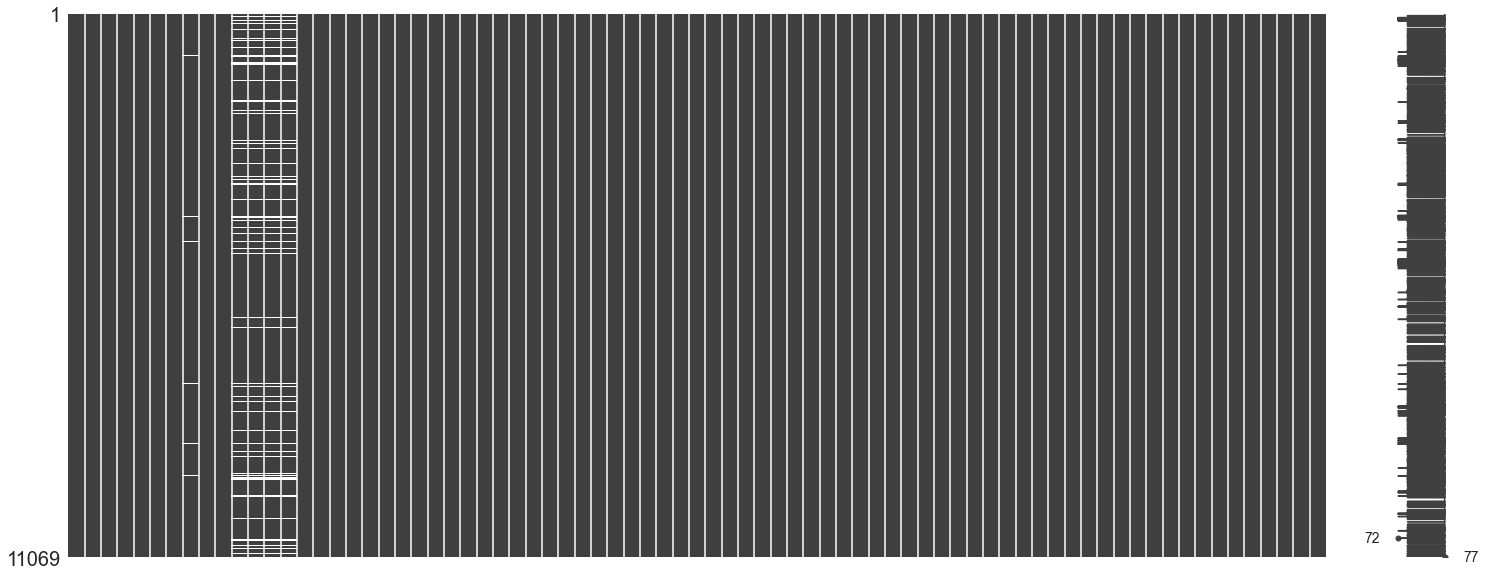

In [99]:
# Looking at missing values. unfortunately we have it missing in patterns to filling and imputing isnt a great idea as we will introduce bias into our models. 
msno.matrix(df)

In [100]:
df.isnull().sum()

DriverNumber               0
DriverCount                0
ClaimCount                 0
TotalPaid                  0
ClaimStatus                0
                          ..
_Comparative Negligence    0
_Fault unknown             0
_Insured at fault          0
_No fault                  0
_Other party at fault      0
Length: 77, dtype: int64

In [101]:
# Begone nulls
nullbegone = df.dropna()

In [102]:
df = nullbegone

In [103]:
df.isnull().sum()

DriverNumber               0
DriverCount                0
ClaimCount                 0
TotalPaid                  0
ClaimStatus                0
                          ..
_Comparative Negligence    0
_Fault unknown             0
_Insured at fault          0
_No fault                  0
_Other party at fault      0
Length: 77, dtype: int64

<AxesSubplot:>

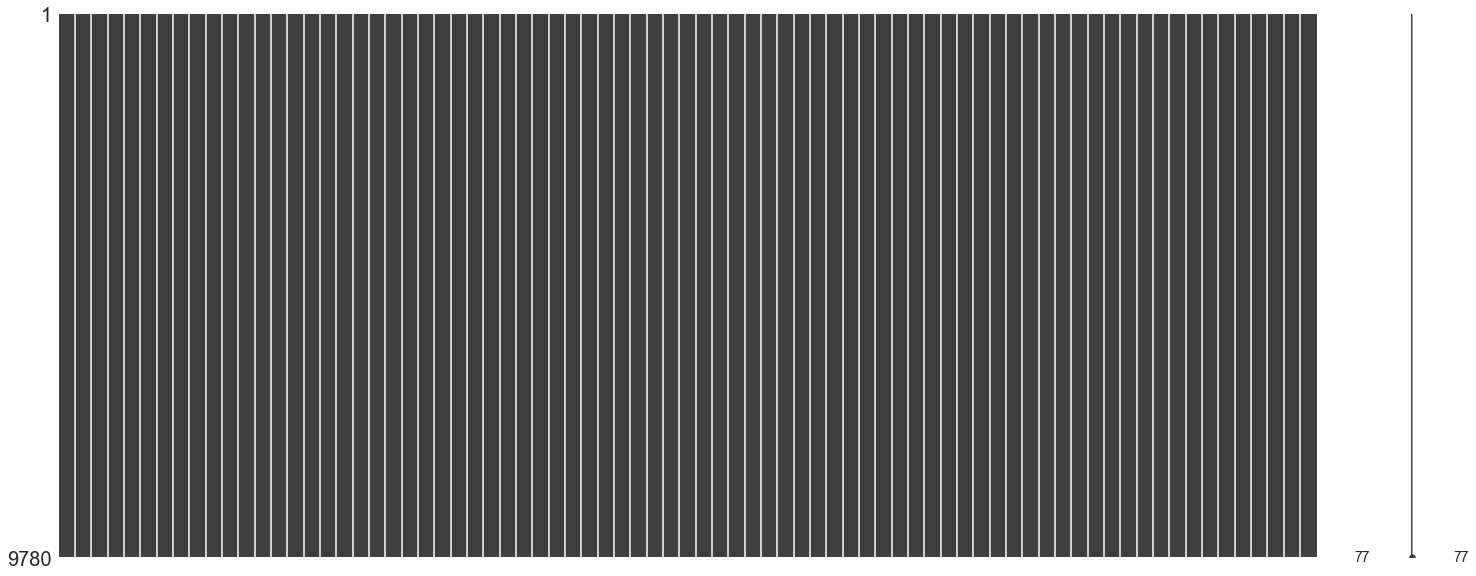

In [104]:
# All clean
msno.matrix(df)

## I chose to drop missing values due to all missing values were not missing at random and therefore cannot be imputed efficiently without skewing our results. 
## We still have 9780 observations though so we still have a robust dataset to work with. 

In [105]:
#  This line of code created out Risk Variable by looking at the Total amount paid, the number of counts and who was at fault then returning a value based on that observation. 
df['HighRisk'] = np.where(((df['ClaimCount'] > 3) | (df['TotalPaid'] > 3000.0)) & ((df['_Comparative Negligence'] == 1) | (df['_Insured at fault'] == 1)), 1, 0)

In [106]:
# Removing the values we used to create our new feature to avoid bias
df = df.drop(columns = ['ClaimCount','TotalPaid','_Comparative Negligence','_Insured at fault'], axis =1)

In [107]:
df

,DriverNumber,DriverCount,ClaimStatus,DriverID,LossState,PolicyStateCode,SubrogrationFlag,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,_2 CAR COLL MIN,_ACCIDENT W/INJURY,_ANIMAL,_BIKECOLLISION,_COV ISSUE 2 OR LESS VEHS,_COV ISSUE 3 OR MORE VEHS,_COVERAGE ISSUE,_COVERAGE ISSUE W/INJ,_DNOP,_FALLINGOBJECT,_FATALITY,_FIRE,_FIXEDOBJCOLL,_GLASS ONLY/TOWING,_GLASSBREAKAGE,_HAIL,_LAWSUIT,_LEFTCOLLISION,_LOADINGDAMAGE,_MULTI CAR COLL W/INJ MIN,_MULTI-CAR COLL MIN,_NEW YORK/NEW JERSEY,_ONE CAR COLL MIN,_PD ONLY (1 CAR),_PD ONLY (2 CARS),_PD ONLY (2 OR MORE CARS),_PD ONLY (3 OR MORE CARS),_PEDCOLLISION,_PEDESTRIAN,_PEDESTRIAN/FATALATIES,_PG_COLLISIONBACKING,_PG_COLLISIONINTERSECTION,_PG_COLLISIONMERGE,_PG_COLLISIONWITHPARKEDCAR,_PG_CVREARENDIV,_PG_FLOOD,_PG_HAZARDOUS,_PG_HIT_RUN,_PG_IVREARENDCV,_PG_IV_REPOSSESSED,_PG_PARKED,_PG_TORNADO,_PG_TOWONLY,_PG_UNLAWFULLY_PARKED,_PIP ONLY,_REAREND,_RIOTANDCIVIL,_ROLLOVER,_THEFT/FIRE,_THEFTENTIRE,_THEFTPARTS,_THEFTS,_TRAINBUSCOLL,_UNVERIFIED,_UNVERIFIED W/INJURY,_VANDALISM,_VEHCOLLISION,_VNOP,_Fault unknown,_No fault,_Other party at fault,HighRisk
0,1,4,0,98,6,6.0,0,1,9.0,5086.61,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,2,0,1,6,6.0,0,1,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,0,1,6,6.0,0,1,53.0,21397.74,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,5,0,98,6,6.0,1,2,14.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,5,0,1,6,6.0,0,2,1.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11063,1,2,0,1,50,50.0,0,1,8.0,5462.64,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11064,1,1,0,1,32,50.0,0,1,1.0,0.00,18.0,432.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
11066,1,2,0,99,50,50.0,0,1,9.0,2876.38,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11067,1,1,0,1,50,50.0,0,1,8.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [108]:
# target
y = df.HighRisk
y.head()

0    0
1    0
2    1
3    0
4    0
Name: HighRisk, dtype: int32

In [109]:
# Predictors
X = df.drop('HighRisk', axis = 1) # removes Sales from the datafram and recallibrates the axis. 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9780 entries, 0 to 11068
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DriverNumber                9780 non-null   int64  
 1   DriverCount                 9780 non-null   int64  
 2   ClaimStatus                 9780 non-null   int32  
 3   DriverID                    9780 non-null   int64  
 4   LossState                   9780 non-null   int64  
 5   PolicyStateCode             9780 non-null   float64
 6   SubrogrationFlag            9780 non-null   int32  
 7   VehicleID                   9780 non-null   int64  
 8   ClaimTransCount             9780 non-null   float64
 9   ClaimTransPaidLoss          9780 non-null   float64
 10  DaysToClaim                 9780 non-null   float64
 11  DaysToClaim_h               9780 non-null   float64
 12  _2 CAR COLL MIN             9780 non-null   int32  
 13  _ACCIDENT W/INJURY          9780

In [110]:
# the Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Splits the training data to 80% and the testing set to 20%

In [111]:
X_train.head()

,DriverNumber,DriverCount,ClaimStatus,DriverID,LossState,PolicyStateCode,SubrogrationFlag,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,_2 CAR COLL MIN,_ACCIDENT W/INJURY,_ANIMAL,_BIKECOLLISION,_COV ISSUE 2 OR LESS VEHS,_COV ISSUE 3 OR MORE VEHS,_COVERAGE ISSUE,_COVERAGE ISSUE W/INJ,_DNOP,_FALLINGOBJECT,_FATALITY,_FIRE,_FIXEDOBJCOLL,_GLASS ONLY/TOWING,_GLASSBREAKAGE,_HAIL,_LAWSUIT,_LEFTCOLLISION,_LOADINGDAMAGE,_MULTI CAR COLL W/INJ MIN,_MULTI-CAR COLL MIN,_NEW YORK/NEW JERSEY,_ONE CAR COLL MIN,_PD ONLY (1 CAR),_PD ONLY (2 CARS),_PD ONLY (2 OR MORE CARS),_PD ONLY (3 OR MORE CARS),_PEDCOLLISION,_PEDESTRIAN,_PEDESTRIAN/FATALATIES,_PG_COLLISIONBACKING,_PG_COLLISIONINTERSECTION,_PG_COLLISIONMERGE,_PG_COLLISIONWITHPARKEDCAR,_PG_CVREARENDIV,_PG_FLOOD,_PG_HAZARDOUS,_PG_HIT_RUN,_PG_IVREARENDCV,_PG_IV_REPOSSESSED,_PG_PARKED,_PG_TORNADO,_PG_TOWONLY,_PG_UNLAWFULLY_PARKED,_PIP ONLY,_REAREND,_RIOTANDCIVIL,_ROLLOVER,_THEFT/FIRE,_THEFTENTIRE,_THEFTPARTS,_THEFTS,_TRAINBUSCOLL,_UNVERIFIED,_UNVERIFIED W/INJURY,_VANDALISM,_VEHCOLLISION,_VNOP,_Fault unknown,_No fault,_Other party at fault
4807,1,4,0,99,37,37.0,0,10,15.0,11838.52,0.5,12.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5636,1,1,0,1,37,37.0,0,1,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
670,1,1,0,98,5,5.0,0,1,4.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2515,1,1,1,1,12,12.0,0,1,24.0,32062.50,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10249,1,4,0,1,46,46.0,0,1,7.0,4375.60,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [112]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 1577 to 3346
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DriverNumber                1956 non-null   int64  
 1   DriverCount                 1956 non-null   int64  
 2   ClaimStatus                 1956 non-null   int32  
 3   DriverID                    1956 non-null   int64  
 4   LossState                   1956 non-null   int64  
 5   PolicyStateCode             1956 non-null   float64
 6   SubrogrationFlag            1956 non-null   int32  
 7   VehicleID                   1956 non-null   int64  
 8   ClaimTransCount             1956 non-null   float64
 9   ClaimTransPaidLoss          1956 non-null   float64
 10  DaysToClaim                 1956 non-null   float64
 11  DaysToClaim_h               1956 non-null   float64
 12  _2 CAR COLL MIN             1956 non-null   int32  
 13  _ACCIDENT W/INJURY          19

In [113]:
# Basic Decision Tree Classifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [114]:
# Predictions
y_predictions = clf_tree.predict(X_test)

In [115]:
# Train r2
score_train = clf_tree.score(X_train, y_train)
print(score_train)
print("")

0.9997443762781186



In [116]:
# Test r2
score_test = clf_tree.score(X_test, y_test)
print(score_test)
print("")

0.8951942740286298



In [117]:
# Accuracy
acc_score = accuracy_score(y_test, y_predictions)
print(acc_score)
print("")

0.8951942740286298



In [118]:
# Building a confusion Matrix 
cm1 = pd.DataFrame(confusion_matrix(y_test, y_predictions), index=['No', 'Yes'], columns=['No', 'Yes'])
cm1.index.name = 'True'
cm1.columns.name = 'Predicted'
cm1

Predicted,No,Yes
True,,
No,1245,110
Yes,95,506


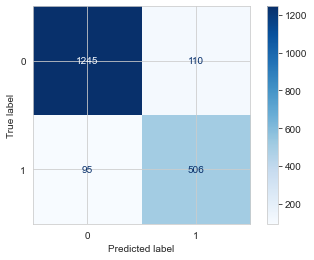

In [119]:
# This initial Matrix looks pretty Okay!
plot_confusion_matrix(clf_tree, X_test, y_test,cmap="Blues", values_format='d')
plt.show() 

In [120]:
# We have a recall of 90! On the first try! Not baaad!
print(classification_report(y_test, clf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1355
           1       0.82      0.84      0.83       601

    accuracy                           0.90      1956
   macro avg       0.88      0.88      0.88      1956
weighted avg       0.90      0.90      0.90      1956



In [121]:
from sklearn import metrics

In [122]:
# Recalculated accuracy
accuracy = metrics.accuracy_score(y_test, y_predictions)
accuracy

0.8951942740286298

In [123]:
# This bit of code is used to calculate the Sensitivity Specificity and Accuracy
accuracy = metrics.accuracy_score(y_test, y_predictions)
recall_sensitivity = metrics.recall_score(y_test, y_predictions, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_predictions, pos_label=0)
recall_sensitivity, recall_specificity , accuracy

(0.8419301164725458, 0.9188191881918819, 0.8951942740286298)

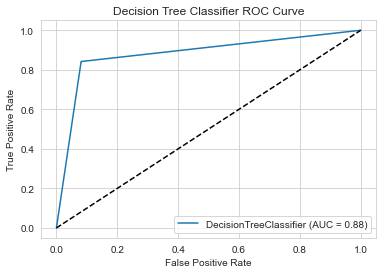

In [124]:
# The First Curve! Not too bad got an AUC of .88! 
plot_roc_curve(clf_tree, X_test, y_test)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve')
plt.show()

In [125]:
accuracy = metrics.accuracy_score(y_test, y_predictions)
recall_sensitivity = metrics.recall_score(y_test, y_predictions, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_predictions, pos_label=0)
recall_sensitivity, recall_specificity , accuracy
print(f' the Sensitivity is:{recall_sensitivity}')
print(f' the Specificity is:{recall_specificity}')
print(f' the Accuracy is:{accuracy}')

 the Sensitivity is:0.8419301164725458
 the Specificity is:0.9188191881918819
 the Accuracy is:0.8951942740286298


In [126]:
# Used to view all Feature Importances
pd.set_option('display.max_rows', 73)

In [127]:
# Shows the feature importances for our model
feat_imp = pd.DataFrame(clf_tree.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([feat_imp, names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

,Importance,Features
9,0.454434,ClaimTransPaidLoss
71,0.179328,_No fault
72,0.166151,_Other party at fault
8,0.028385,ClaimTransCount
5,0.027936,PolicyStateCode
4,0.025808,LossState
1,0.023502,DriverCount
7,0.017142,VehicleID
3,0.012392,DriverID
50,0.007915,_PG_IVREARENDCV


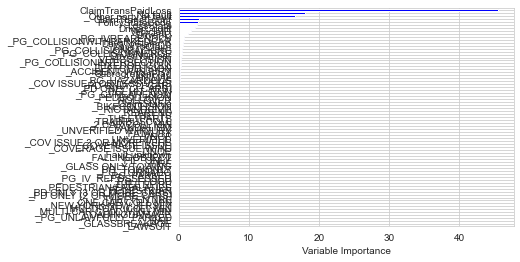

In [128]:
# This is a bad visualization i our instance lets cut it down
Importance = pd.DataFrame({'Importance':clf_tree.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [129]:
# This cuts the features from our model based on a threshold I declared. I chose .009 as it was a good point where features fell off. 
df_feat_imp =df_feat_imp[df_feat_imp['Importance']>0.009].round(4)
df_feat_imp

,Importance,Features
1,0.0235,DriverCount
3,0.0124,DriverID
4,0.0258,LossState
5,0.0279,PolicyStateCode
7,0.0171,VehicleID
8,0.0284,ClaimTransCount
9,0.4544,ClaimTransPaidLoss
71,0.1793,_No fault
72,0.1662,_Other party at fault


# From here I wanted to play with a few features we went over in class to see I fi could improve the Decision tree using various methods. 

In [130]:
#Using Cost Complexity to prune the tree since we have 50 million predictors
path = clf_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

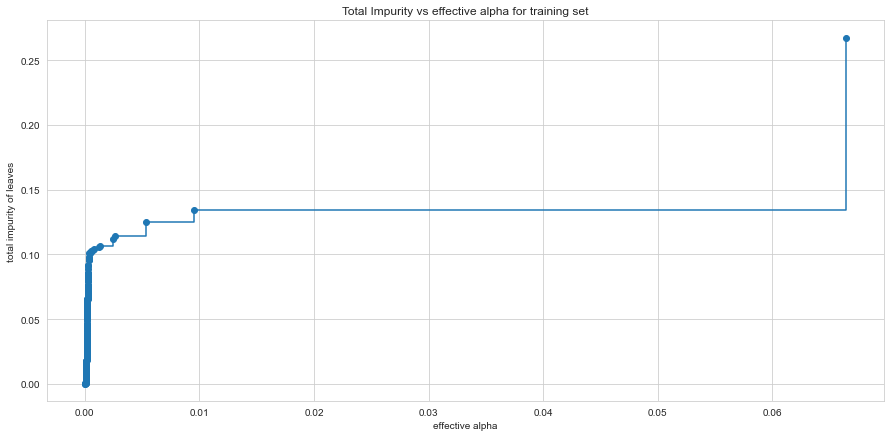

In [131]:
# Here we can see Alphas affect on node purity
fig, ax = plt.subplots(figsize=(15,7))
#the maximum effective alpha value is removed, because it is the trivial tree with only one node
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [186]:
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 3.65176746e-05, 6.08627909e-05,
       7.30353491e-05, 7.86534529e-05, 7.86534529e-05, 8.07232806e-05,
       8.08382710e-05, 8.13348206e-05, 8.29049909e-05, 8.33555615e-05,
       8.36002109e-05, 8.38110564e-05, 8.52079073e-05, 8.52079073e-05,
       8.52079073e-05, 8.70337910e-05, 9.58588957e-05, 9.58588957e-05,
       9.58588957e-05, 1.02249489e-04, 1.04573341e-04, 1.04573341e-04,
       1.06509884e-04, 1.06509884e-04, 1.08148498e-04, 1.09553024e-04,
       1.10770279e-04, 1.11835378e-04, 1.11835378e-04, 1.11835378e-04,
       1.13610543e-04, 1.13610543e-04, 1.13610543e-04, 1.13610543e-04,
       1.13610543e-04, 1.15030675e-04, 1.15030675e-04, 1.15639303e-04,
       1.15829499e-04, 1.17160873e-04, 1.17586912e-04, 1.17980179e-04,
       1.17980179e-04, 1.17980179e-04, 1.18682442e-04, 1.19823620e-04,
       1.20293516e-04, 1.20293516e-04, 1.20293516e-04, 1.20508326e-04,
       1.21084921e-04, 1.21313772e-04, 1.21421268e-04, 1.23330652e-04,
      

In [132]:
# Returns the last nodes alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16243479789152482


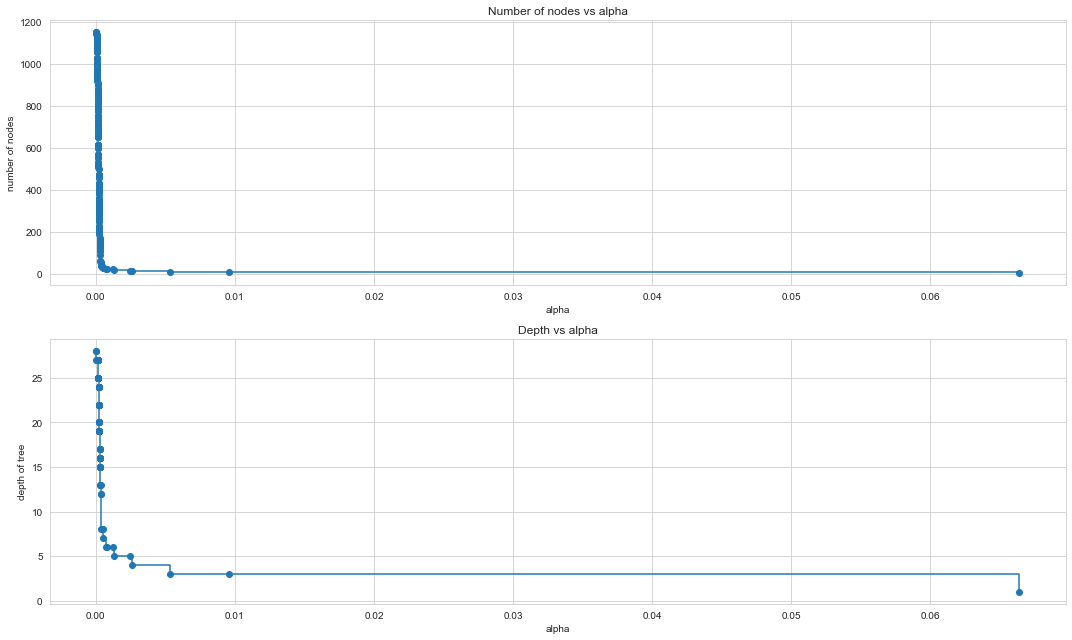

In [133]:
# We are able to view alphas relation to node counts with thise code.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15,9))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

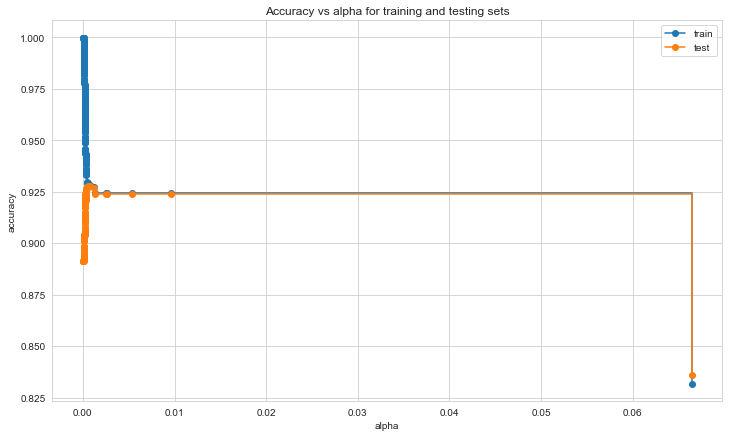

In [134]:
# Here we compare model accuracy based on alpha values
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(12,7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [135]:
# Building a model with best alpha value
clf = DecisionTreeClassifier(ccp_alpha = 0.018, random_state=42) #max_depth = 5
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
print(clf.score(X_train, y_train),clf.score(X_test, y_test) )

0.9242075664621677 0.9238241308793456


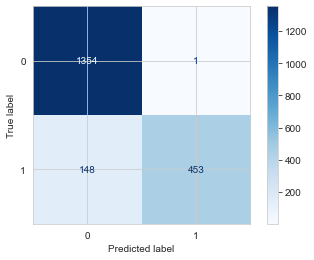

In [136]:
# Confusion Matrix from our new data. WHOAH LOOOOK at that. 
plot_confusion_matrix(clf, X_test, y_test,cmap="Blues", values_format='d')
plt.show() 

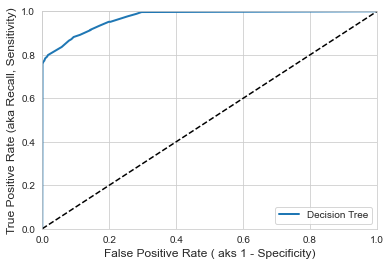

In [187]:
test_probab = clf.predict_proba(X_test)
y_probab = test_probab[:,1]#

decision_tree_fpr, decision_tree_tpr, thresholds = roc_curve(y_test, y_probab)
roc_auc = auc(decision_tree_fpr, decision_tree_tpr)

plot_roc_curve(decision_tree_fpr, decision_tree_tpr, "Decision Tree")
plt.legend(loc="lower right")
plt.show()



iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done


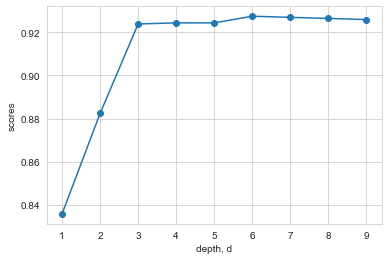

In [140]:
# the following code will determine the best depth for our model
depth = range(1,10)
scores = []

for d in depth:
    clf = DecisionTreeClassifier(max_depth = d)
    clf =clf.fit(X_train,y_train)
    scores.append(clf.score(X_test, y_test))
    print("iteration {} done".format(d))


plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

In [141]:
# Model built with best depth
clf1 = DecisionTreeClassifier(max_depth = 3) # which also correspondes to best ccp_alpha
clf1.fit(X_train, y_train)
train_pred = clf1.predict(X_train)
test_pred = clf1.predict(X_test)
print(clf1.score(X_train, y_train),clf1.score(X_test, y_test) )

0.9242075664621677 0.9238241308793456


In [142]:
# Wow specificity is awesome but Sensitivity has suffered Lets Look at it and try a  new model. 
accuracy = metrics.accuracy_score(y_test, test_pred)
recall_sensitivity = metrics.recall_score(y_test, test_pred, pos_label=1)
recall_specificity = metrics.recall_score(y_test, test_pred, pos_label=0)
recall_sensitivity, recall_specificity , accuracy
print(f' the Sensitivity is:{recall_sensitivity}')
print(f' the Specificity is:{recall_specificity}')
print(f' the Accuracy is:{accuracy}')

 the Sensitivity is:0.7537437603993344
 the Specificity is:0.9992619926199262
 the Accuracy is:0.9238241308793456


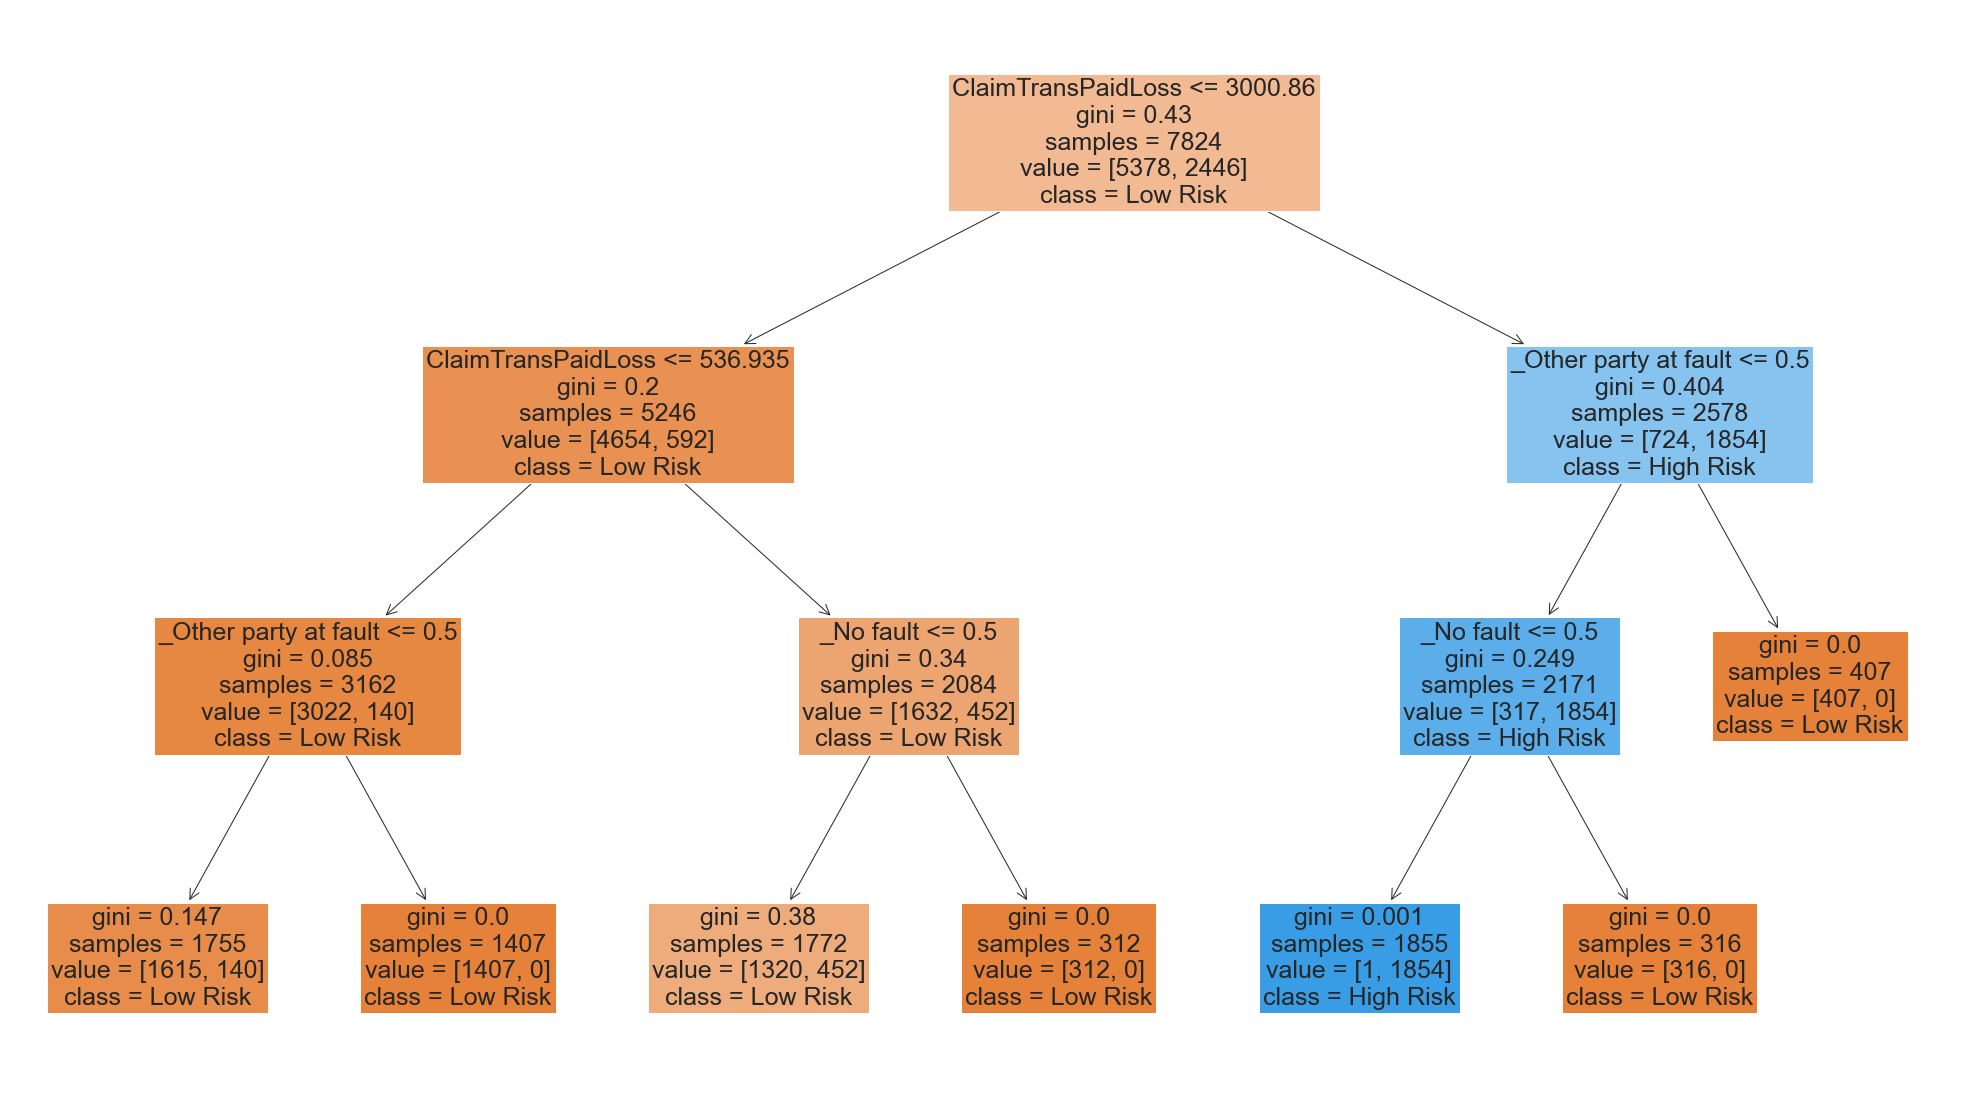

In [143]:
fig = plt.figure(figsize=(35,20))
tree.plot_tree(clf1,feature_names= X.columns,class_names=['Low Risk', 'High Risk'], fontsize = 25, filled=True)
plt.show()

In [144]:
# Random Forest Model
clf_rf = RandomForestClassifier(class_weight = 'balanced',random_state = 42, n_estimators=100, max_depth = 5) #max_depth = 5,specify max depth otherwise it may overfit
clf_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [145]:
# Random Forest Confusion Matrix
pred_train = clf_rf.predict(X_train)
cm = confusion_matrix(y_train, pred_train)
cm

array([[4850,  528],
       [ 322, 2124]], dtype=int64)

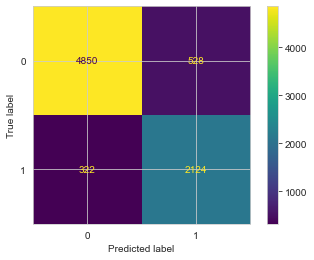

In [146]:
# These numbers are not making me feel too good. Lets go deeper
plot_confusion_matrix(clf_rf, X_train, y_train)  
plt.show()

In [147]:
pred_test = clf_rf.predict(X_test)

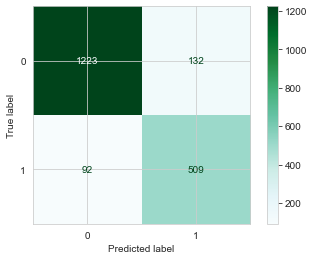

In [148]:
# Proportionally these are the same on the test set., 
plot_confusion_matrix(clf_rf, X_test, y_test, cmap = 'BuGn')  
plt.show() 

In [149]:

clf_rf.score(X_test, y_test) #Return the mean accuracy on the given test data and labels

0.885480572597137

In [150]:
# Precision of the model using test data 
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1355
           1       0.79      0.85      0.82       601

    accuracy                           0.89      1956
   macro avg       0.86      0.87      0.87      1956
weighted avg       0.89      0.89      0.89      1956



In [151]:
feat_imp = pd.DataFrame(clf_rf.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([feat_imp, names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

,Importance,Features
9,2.724913e-01,ClaimTransPaidLoss
72,2.245192e-01,_Other party at fault
8,1.582116e-01,ClaimTransCount
71,1.516277e-01,_No fault
6,4.147982e-02,SubrogrationFlag
26,2.201758e-02,_GLASSBREAKAGE
50,2.186008e-02,_PG_IVREARENDCV
3,2.060911e-02,DriverID
14,1.541752e-02,_ANIMAL
46,1.253408e-02,_PG_CVREARENDIV


In [152]:
df_feat_imp =df_feat_imp[df_feat_imp['Importance']>0.009].round(4)
df_feat_imp

,Importance,Features
3,0.0206,DriverID
6,0.0415,SubrogrationFlag
8,0.1582,ClaimTransCount
9,0.2725,ClaimTransPaidLoss
14,0.0154,_ANIMAL
26,0.0220,_GLASSBREAKAGE
46,0.0125,_PG_CVREARENDIV
50,0.0219,_PG_IVREARENDCV
71,0.1516,_No fault
72,0.2245,_Other party at fault


In [153]:
y_probab = clf_rf.predict_proba(X_test)

In [154]:
y_probab.shape

(1956, 2)

In [155]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate ( aks 1 - Specificity)', fontsize=12) 
    plt.ylabel('True Positive Rate (aka Recall, Sensitivity)', fontsize=12)    
    plt.grid(True) 

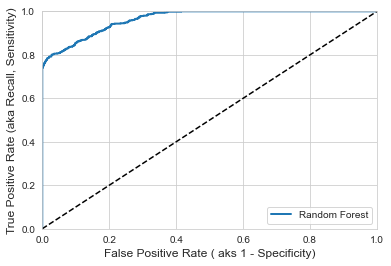

In [181]:
test_probab = clf_rf.predict_proba(X_test)
y_probab = test_probab[:,1]#

random_forest_fpr, random_forest_tpr, thresholds = roc_curve(y_test, y_probab)
roc_auc = auc(random_forest_fpr, random_forest_tpr)

plot_roc_curve(random_forest_fpr, random_forest_tpr, "Random Forest")
plt.legend(loc="lower right")
plt.show()



In [159]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score
scoring = {
    'accuracy':    make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0),
    'AUC': 'roc_auc'
}

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 1, class_weight= 'balanced', max_depth = 10)
param_grid_rf = [
    {"criterion": ['gini', 'entropy'],
    "n_estimators":[200, 500, 750, 1000],
     "max_depth" :[5, 10, 15, 20] 
    }
]

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done


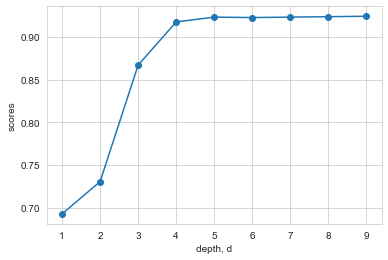

In [161]:
# Finding the Maximum depth of the new RF Model
depth = range(1,10)
scores = []

for d in depth:
    rf = RandomForestClassifier(max_depth = d)
    rf =rf.fit(X_train,y_train)
    scores.append(rf.score(X_test, y_test))
    print("iteration {} done".format(d))


plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

In [162]:
# New RF model built with the best depth 
rf1 = RandomForestClassifier(max_depth = 4) # which also correspondes to best ccp_alpha
rf1.fit(X_train, y_train)
train_pred = rf1.predict(X_train)
test_pred1 = rf1.predict(X_test)
print(clf1.score(X_train, y_train),clf1.score(X_test, y_test) )

0.9242075664621677 0.9238241308793456


In [163]:
accuracy = metrics.accuracy_score(y_test, test_pred1)
recall_sensitivity = metrics.recall_score(y_test, test_pred1, pos_label=1)
recall_specificity = metrics.recall_score(y_test, test_pred1, pos_label=0)
recall_sensitivity, recall_specificity , accuracy
print(f' the Sensitivity is:{recall_sensitivity}')
print(f' the Specificity is:{recall_specificity}')
print(f' the Accuracy is:{accuracy}')

 the Sensitivity is:0.7454242928452579
 the Specificity is:0.9985239852398524
 the Accuracy is:0.9207566462167689


In [164]:
# Logistic Regression
logr = LogisticRegression(max_iter = 10000, random_state = 42, class_weight = 'balanced')
logr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [165]:
# Confusion Matrix, Again doesn't look great
pred_train = logr.predict(X_train)
cm = confusion_matrix(y_train, pred_train)
cm

array([[4435,  943],
       [ 150, 2296]], dtype=int64)

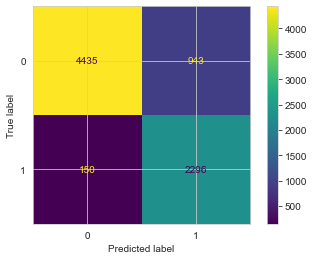

In [166]:
plot_confusion_matrix(logr, X_train, y_train)  
plt.show()

In [167]:
pred_test = logr.predict(X_test)

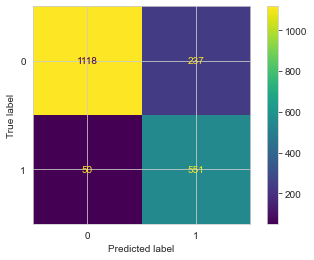

In [168]:
plot_confusion_matrix(logr, X_test, y_test)  
plt.show()

In [169]:
accuracy = metrics.accuracy_score(y_test, pred_test)
recall_sensitivity = metrics.recall_score(y_test, pred_test, pos_label=1)
recall_specificity = metrics.recall_score(y_test, pred_test, pos_label=0)
recall_sensitivity, recall_specificity , accuracy
print(f' the Sensitivity is:{recall_sensitivity}')
print(f' the Specificity is:{recall_specificity}')
print(f' the Accuracy is:{accuracy}')

 the Sensitivity is:0.9168053244592346
 the Specificity is:0.8250922509225093
 the Accuracy is:0.8532719836400818


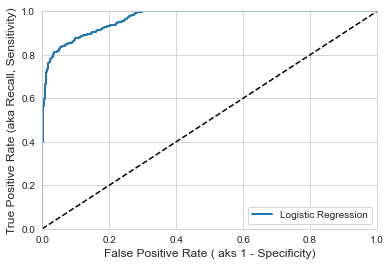

In [182]:
test_probab = logr.predict_proba(X_test)
y_probab = test_probab[:,1]#

logreg_fpr, logreg_tpr, thresholds = roc_curve(y_test, y_probab)
roc_auc = auc(logreg_fpr, logreg_tpr)

plot_roc_curve(logreg_fpr, logreg_tpr, "Logistic Regression")
plt.legend(loc="lower right")
plt.show()



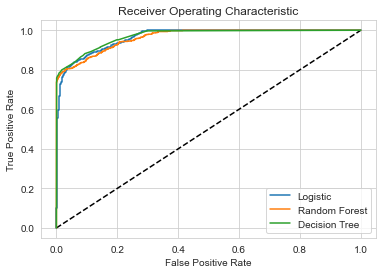

In [185]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(logreg_fpr, logreg_tpr, label= "Logistic")
plt.plot(random_forest_fpr, random_forest_tpr, label= "Random Forest")
plt.plot(decision_tree_fpr, decision_tree_tpr, label= "Decision Tree")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

## As a summation our graphs shows that each Classification model that we refine were practically identical to one another. Logistic Regression however just barely beats the other two models by a slim Margin. Knowing this it is best to look at the Recall rate in the Classification Reports for each Model. This is the sensitivity of the classification models. This again falls on the Logistic regression as it had the highest Sensitivity calculated at 91.7%